In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

(
    yf.pdr_override()
)

import warnings
warnings.filterwarnings('ignore')

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

%matplotlib inline

In [3]:
# SciKit-Learn Package
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler # Pre-processing (Feature Engineering)
from sklearn.model_selection import train_test_split # Data Segregation
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV # Cross-validation strategies
from sklearn.feature_selection import chi2, f_regression, SelectKBest # Feature Selection
from sklearn.metrics import mean_squared_error # Residue Error


# Stats Model Package
import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf # assumption checks for Time-Series


from pandas.plotting import scatter_matrix

# AGNES

In [4]:
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.preprocessing import StandardScaler


from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold,metrics

import matplotlib.ticker as ticker
from itertools import cycle

In [5]:
nasdaq100_components = pd.read_html("https://en.wikipedia.org/wiki/Nasdaq-100")[4]
tickers = nasdaq100_components['Ticker'].tolist()
start =(dt.date(2019, 10, 24))
end =(dt.date(2023, 10, 25))

In [6]:
stock_list = []
for ticker in tickers:
    stock = yf.download(ticker,start,end)
    data = stock["Adj Close"]
    stock_list.append(pd.Series(data, name=ticker))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [8]:
stock_data = pd.DataFrame(stock_list).T

missing_fractions = \
    stock_data \
    .isnull() \
    .mean() \
    .sort_values(ascending = False)

drop_list =\
    sorted(list(missing_fractions
                [missing_fractions > 0.3]
                .index)
           )

stock_data =\
    stock_data \
    .drop(labels= drop_list, 
          axis=1)

stock_data = stock_data.fillna(method = "ffill")

In [9]:
#Calculate average annual percentage return and volatilities over a theoretical one year period

returns =\
(
    stock_data
    .pct_change()
    .mean() 
    * 252
)

returns = pd.DataFrame(returns)

returns.columns = ["Returns"]

returns["Volatility"] =\
(    
     stock_data
    .pct_change()
    .std() 
    * np.sqrt(252)
)

data = returns
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

In [10]:
scaler = StandardScaler().fit(data)
rescaledDataset = pd.DataFrame(scaler.fit_transform(returns),columns = returns.columns, index = returns.index)
X = rescaledDataset

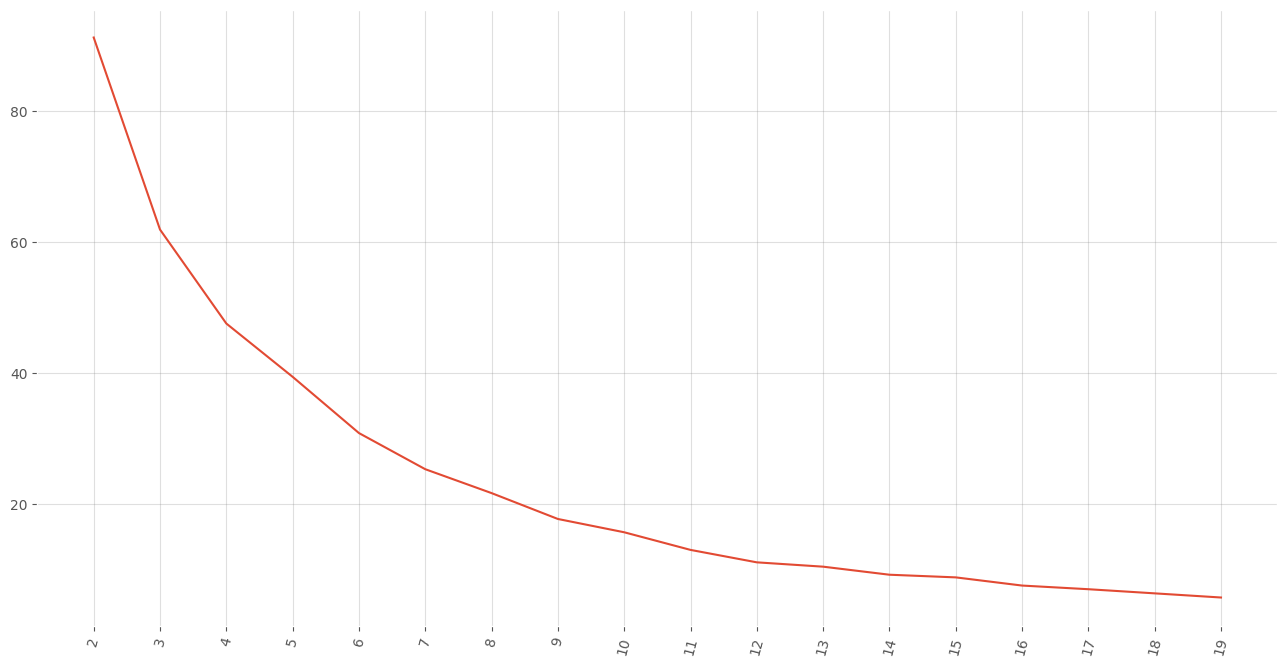

In [11]:
distorsions = []

max_loop = 20

for k in range(2, max_loop):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(16, 8))

plt.plot(range(2, max_loop), distorsions)

plt.xticks([i for i in range(2, max_loop)], 
           rotation=75)

plt.grid(True)

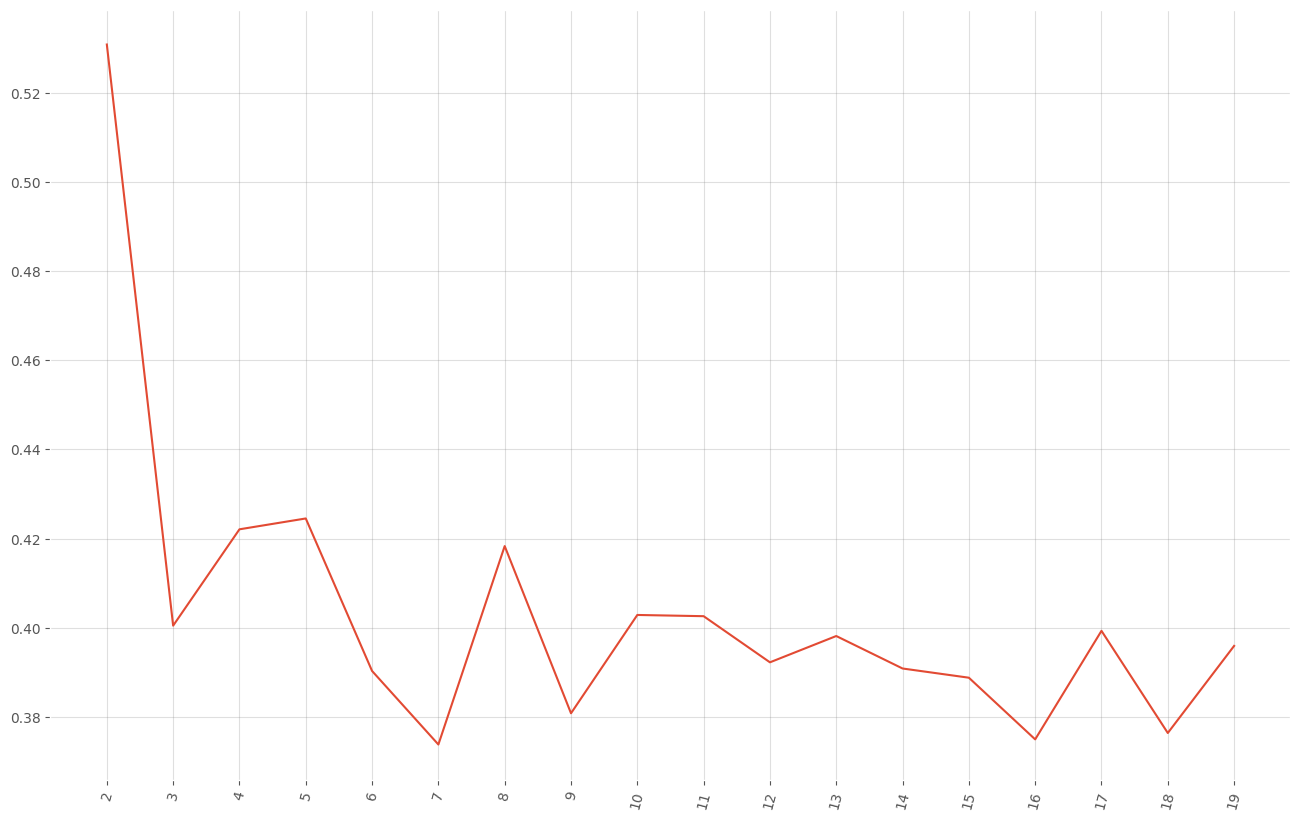

In [12]:
silhouette_score = []

for k in range(2, max_loop):
        kmeans = KMeans(n_clusters = k,  
                        random_state = 10, 
                        n_init = 10)
        kmeans.fit(X)        
        silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state=10)
                               )
        
fig = plt.figure(figsize=(16, 10)
                )

plt.plot(range(2, max_loop), silhouette_score)

plt.xticks([i for i in range(2, max_loop)], 
           rotation=75)

plt.grid(True)

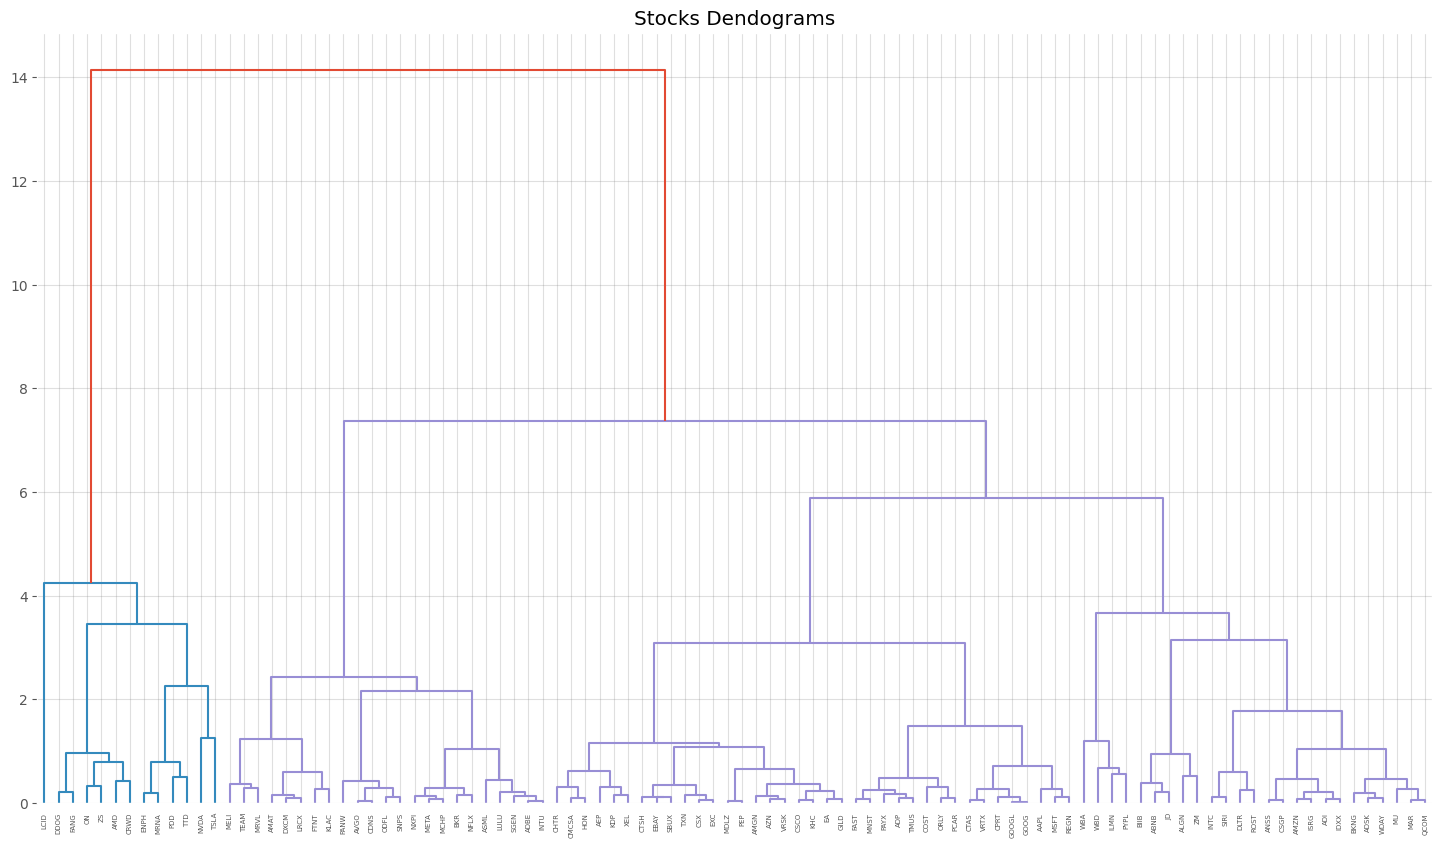

In [13]:
#Calulate linkage
link = linkage(X, 
            method = "ward")

# Plot Dendogram

plt.figure(figsize=(18, 10)
          )
plt.title("Stocks Dendograms")

dendrogram(link, labels = X.index)

plt.show()


In [14]:
link[0]

array([4.   , 5.   , 0.011, 2.   ])

In [15]:
columns = stock_data.columns
print(f"{columns[4]} and {columns[5]} is the most corelated pair of stocks.")

GOOGL and GOOG is the most corelated pair of stocks.


In [16]:
link_stocks = link[link[:, 3] == 2]
link_down = link_stocks[np.argsort(link_stocks[:, 2])[::-1]]
link_down[0]

array([68.   , 87.   ,  1.262,  2.   ])

In [17]:
print(f"{columns[68]} and {columns[87]} is the least corelated pair of stocks.")

NVDA and TSLA is the least corelated pair of stocks.


# PCA

In [4]:
# for unsupervised learning
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

from sklearn.decomposition import TruncatedSVD

from numpy.linalg import inv, eig, svd

from sklearn.manifold import TSNE

# for EDA and Data transformation
from sklearn.preprocessing import StandardScaler

from pandas.plotting import scatter_matrix

In [5]:
nasdaq100_components = pd.read_html("https://en.wikipedia.org/wiki/Nasdaq-100")[4]
df1 = nasdaq100_components
ls_symbol = df1['Ticker'].to_list()
stock_data = pdr.get_data_yahoo(ls_symbol, start = dt.datetime(2010,1,1), end = dt.datetime(2019,12,31))[['Adj Close']]


[*********************100%%**********************]  101 of 101 completed


5 Failed downloads:
['GEHC', 'GFS', 'CEG', 'ABNB', 'LCID']: Exception("%ticker%: Data doesn't exist for startDate = 1262322000, endDate = 1577768400")


In [6]:
missing_values =\
(
    stock_data
    .isnull() # True (1) vs. False (0)
    .mean()
    .sort_values(ascending = False)
)

drop_list =\
(
    sorted(list(missing_values[missing_values > 0.30]
                .index)
          )
)

stock_data =\
(
    stock_data
    .drop(labels = drop_list,
          axis = 1)
)

stock_data =\
(
    stock_data
    .fillna(method = "ffill")
)

stock_data =\
(
    stock_data
    .dropna(axis = 0)
)

In [7]:
Daily_Linear_Return =\
(
    stock_data
    .pct_change(1)
)

# Operational defition of outliers = data points beyond 3 SD

Daily_Linear_Return =\
(
    Daily_Linear_Return[Daily_Linear_Return 
                        .apply(lambda x:(x - x.mean()
                                        ).abs() < (3 * x.std()
                                                  )
                              )
                        .all(1)
    ]
)

scaler =\
(
    StandardScaler()
    .fit(Daily_Linear_Return)
)

scaled_stock_data =\
(
    pd
    .DataFrame(scaler.fit_transform(Daily_Linear_Return),
               columns = Daily_Linear_Return.columns,
               index = Daily_Linear_Return.index)
)

In [8]:
prop =\
    int(len(scaled_stock_data) * 0.75)

X_Train = scaled_stock_data[    : prop] # First 80% of the data
X_Test  = scaled_stock_data[prop:     ] # Remaining 20% of the data

X_Train_Raw = Daily_Linear_Return[    :prop]
X_Test_Raw  = Daily_Linear_Return[prop:    ]

stock_tickers =\
(
 scaled_stock_data
 .columns
 .values
)

pca = PCA()

PrincipalComponent = pca.fit(X_Train)

<Axes: title={'center': 'Cumulative Explained Variance by Each PC'}>

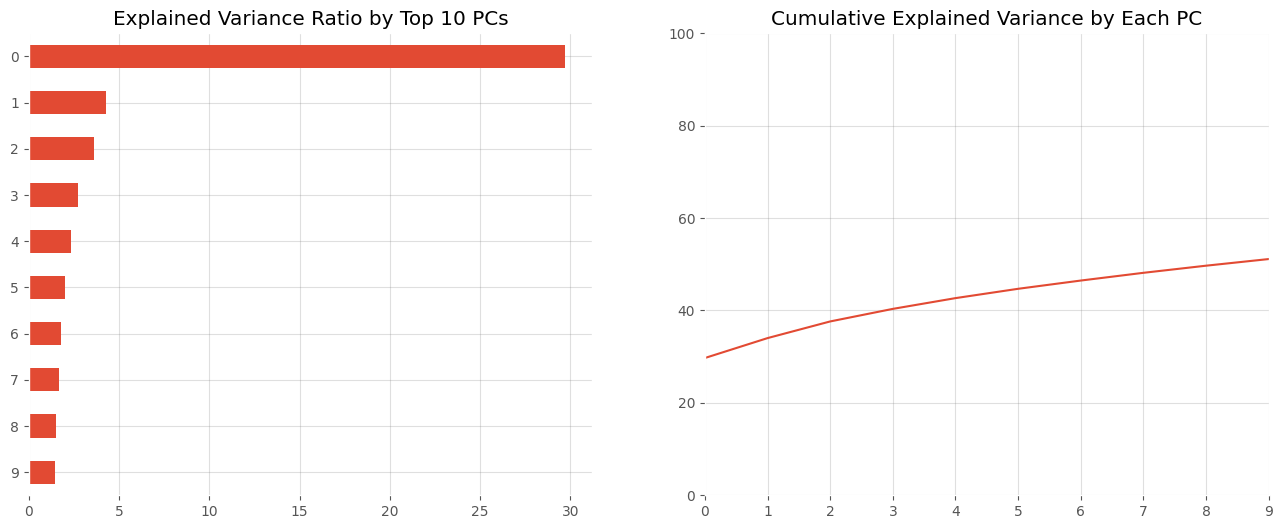

In [9]:
NumEigenValues = 10

fig, axes =\
(
    plt
    .subplots(ncols = 2,
              figsize = [16, 6]
             )
)

# Plot on the left panel

Series1 =\
(
    pd
    .Series(pca
            .explained_variance_ratio_[ :NumEigenValues]
           )
    .sort_values()
    * 100
)

# Plot on the right panel

Series2 =\
(
    pd
    .Series(pca
            .explained_variance_ratio_[ :NumEigenValues]
           )
    .cumsum()
    * 100
)

(
    Series1
    .plot
    .barh(ylim = (0, 9),
          title = "Explained Variance Ratio by Top 10 PCs",
          ax = axes[0]
         )
)

(
    Series2
    .plot(ylim = (0, 100),
          xlim = (0, 9),
          title = "Cumulative Explained Variance by Each PC",
          ax = axes[1]
         )
)

In [10]:
(
    pd
    .Series(np
           .cumsum(pca
                   .explained_variance_ratio_)
           )
    .to_frame("Explained Variance")
    .head(NumEigenValues)
    .style
    .format("{:,.2%}".format)
)

,Explained Variance
0,29.72%
1,34.02%
2,37.63%
3,40.35%
4,42.67%
5,44.69%
6,46.48%
7,48.15%
8,49.69%
9,51.13%


In [11]:
def PCWeights():

    weights = pd.DataFrame()

    for i in range(len(pca.components_)
                  ):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i]
                                                                  )

    weights = weights.values.T
    return weights # Team, be careful with indentation

weights = PCWeights()

In [12]:
# Set the number of principal components to be considered
NumComponents = 4

# Extract the top principal components from the PCA object
# and create a DataFrame with columns named after the original features

topPortfolios =\
(
    pd
    .DataFrame(pca.components_[ : NumComponents],
               columns = stock_data.columns)
)

# Normalize the weights of the top portfolios such that the weights sum up to 1 for each portfolio
# This is done by dividing each weight by the sum of weights for the respective portfolio

eigen_portfolios =\
(
    topPortfolios
    .div(topPortfolios.sum(1),
         axis = 0)
)

# Rename the index of the eigen_portfolios DataFrame for better readability

eigen_portfolios.index = [f"Portfolio {i}" for i in range(NumComponents)
                         ]

# Calculate the square root of the explained variance for each component
# This provides the standard deviation of returns for each eigenportfolio

np.sqrt(pca.explained_variance_)

array([4.982, 1.897, 1.735, 1.507, 1.394, 1.299, 1.221, 1.182, 1.135,
       1.095, 1.073, 1.053, 1.038, 1.013, 0.999, 0.988, 0.968, 0.966,
       0.949, 0.935, 0.929, 0.915, 0.907, 0.888, 0.881, 0.87 , 0.869,
       0.864, 0.857, 0.852, 0.844, 0.828, 0.825, 0.819, 0.807, 0.798,
       0.794, 0.785, 0.781, 0.774, 0.76 , 0.755, 0.746, 0.742, 0.734,
       0.726, 0.716, 0.708, 0.706, 0.701, 0.697, 0.69 , 0.684, 0.683,
       0.673, 0.652, 0.65 , 0.646, 0.64 , 0.633, 0.629, 0.621, 0.617,
       0.609, 0.605, 0.587, 0.582, 0.576, 0.568, 0.563, 0.55 , 0.54 ,
       0.538, 0.535, 0.522, 0.506, 0.491, 0.476, 0.463, 0.449, 0.433,
       0.421, 0.408, 0.332, 0.097])

In [13]:
eigen_portfolios

Adj Close                                                    \
                 AAPL      ADBE       ADI       ADP      ADSK       AEP   
Portfolio 0  0.010162  0.014804  0.014353  0.015341  0.013749  0.006741   
Portfolio 1 -0.170515  0.015871 -0.254216  0.327332 -0.193802  0.797792   
Portfolio 2 -0.234086  0.078466 -0.509313 -0.039391  0.047403 -0.145431   
Portfolio 3 -0.162866 -0.281576  0.278283  0.003059 -0.133354  0.773865   

                                                     ...                      \
                 ALGN      AMAT       AMD      AMGN  ...      SNPS      TMUS   
Portfolio 0  0.011035  0.013721  0.008273  0.013049  ...  0.013751  0.009981   
Portfolio 1 -0.168814 -0.246977 -0.253742  0.011899  ... -0.077784  0.027166   
Portfolio 2  0.195794 -0.516339 -0.168988  0.566281  ...  0.049918  0.090075   
Portfolio 3 -0.051750  0.068863 -0.030857  0.808155  ... -0.144944  0.075957   

                                                                         \
                 TSLA       TXN      VRSK      VRTX       WBA       WBD   
Portfolio 0  0.007041  0.015300  0.013350  0.011967  0.010156  0.010113   
Portfolio 1 -0.137150 -0.108082  0.235146 -0.319942  0.322426  0.013712   
Portfolio 2  0.199647 -0.525493  0.131307  0.607815  0.083729 -0.022001   
Portfolio 3 -0.369016  0.135824 -0.174563  0.631830 -0.132121  0.033134   

                                 
                 WDAY       XEL  
Portfolio 0  0.011326  0.007103  
Portfolio 1 -0.210949  0.838946  
Portfolio 2  0.233179 -0.082503  
Portfolio 3 -0.370782  0.657387  

[4 rows x 85 columns]

array([[<Axes: title={'center': 'Portfolio 0'}>],
       [<Axes: title={'center': 'Portfolio 1'}>],
       [<Axes: title={'center': 'Portfolio 2'}>],
       [<Axes: title={'center': 'Portfolio 3'}>]], dtype=object)

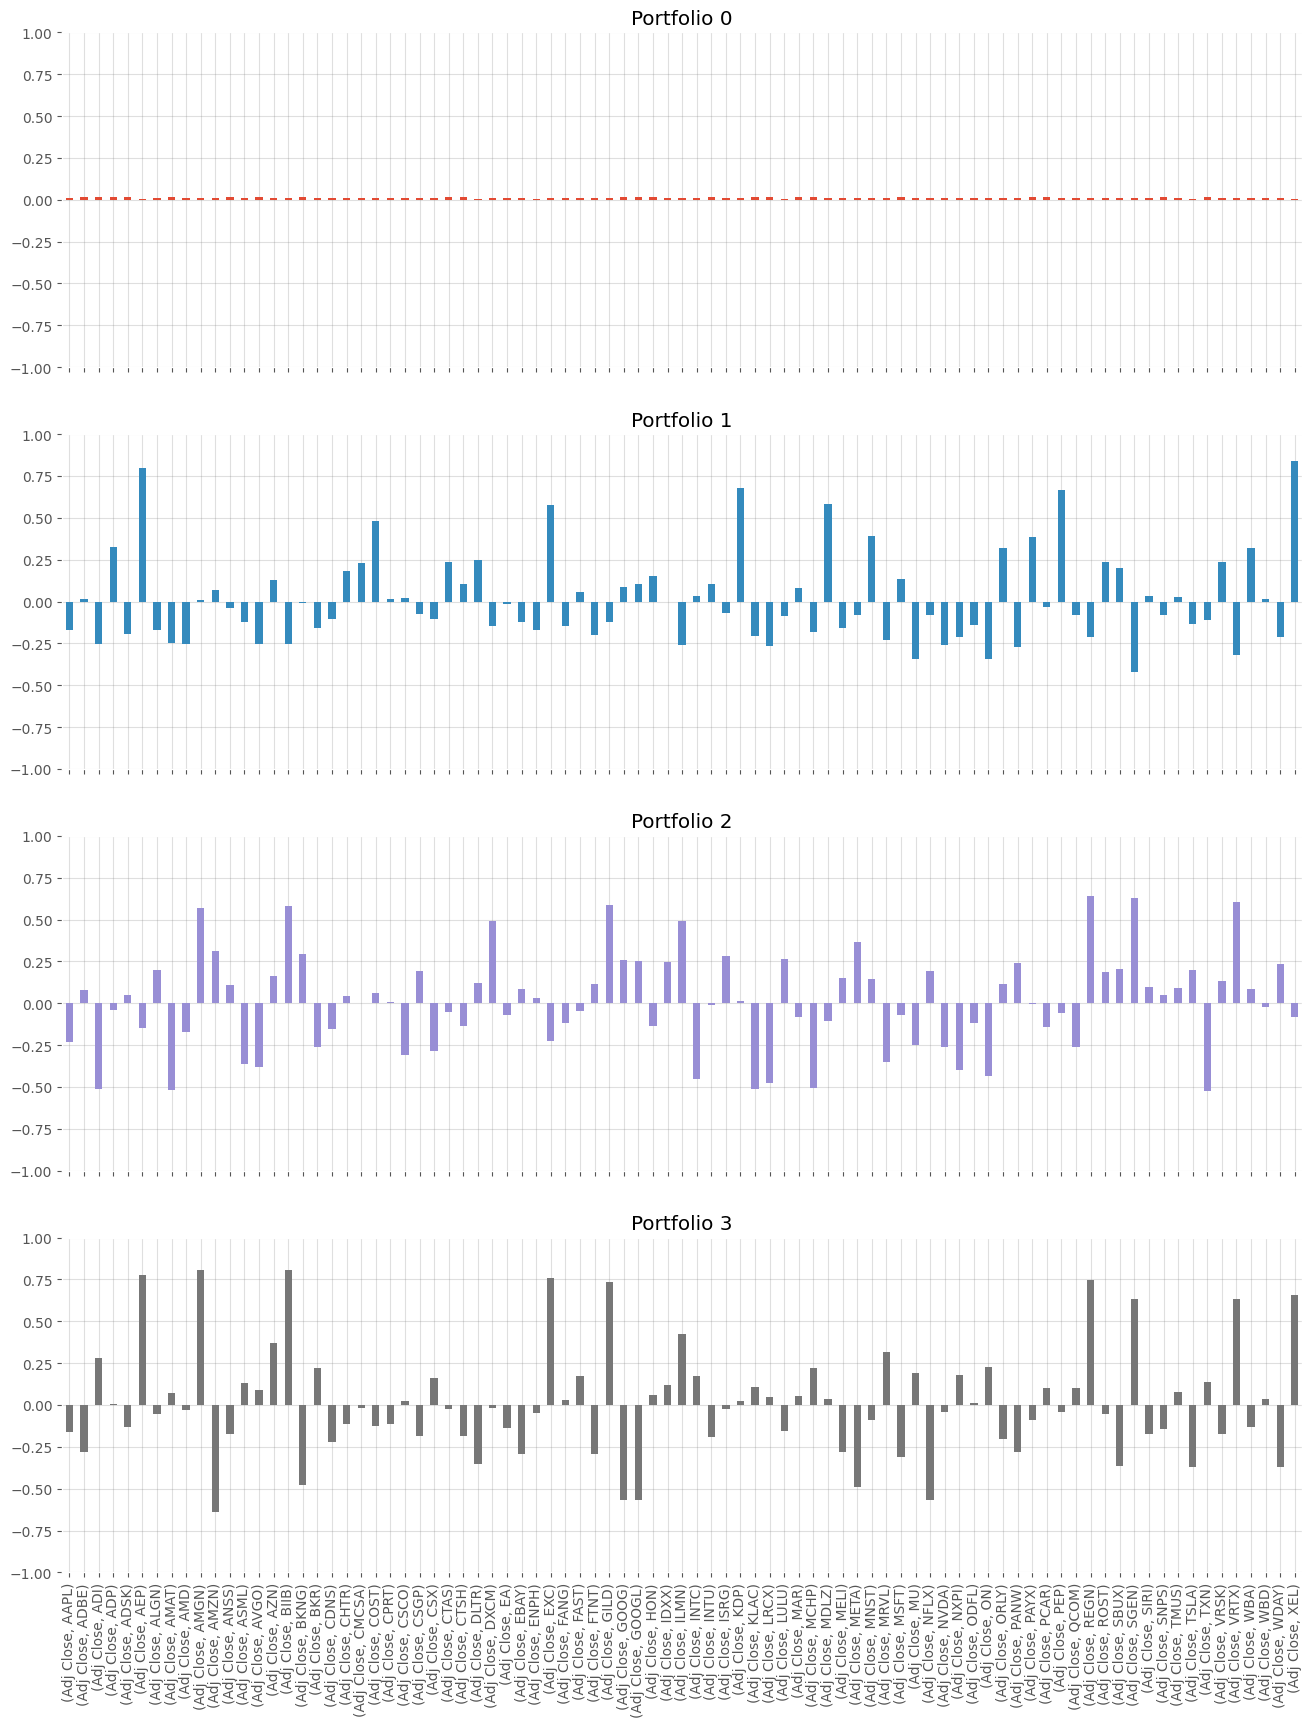

In [14]:
(
    eigen_portfolios
    .T  # Transpose the DataFrame to have portfolios as columns and assets as rows
    .plot
    .bar(subplots = True,
         layout = (int(NumComponents), 1),
         legend = False,
         sharey = True,
         figsize = [16, 20],
         ylim = [-1, 1]
        )
)

array([[<Axes: title={'center': 'Portfolio 0'}>],
       [<Axes: >],
       [<Axes: >],
       [<Axes: >]], dtype=object)

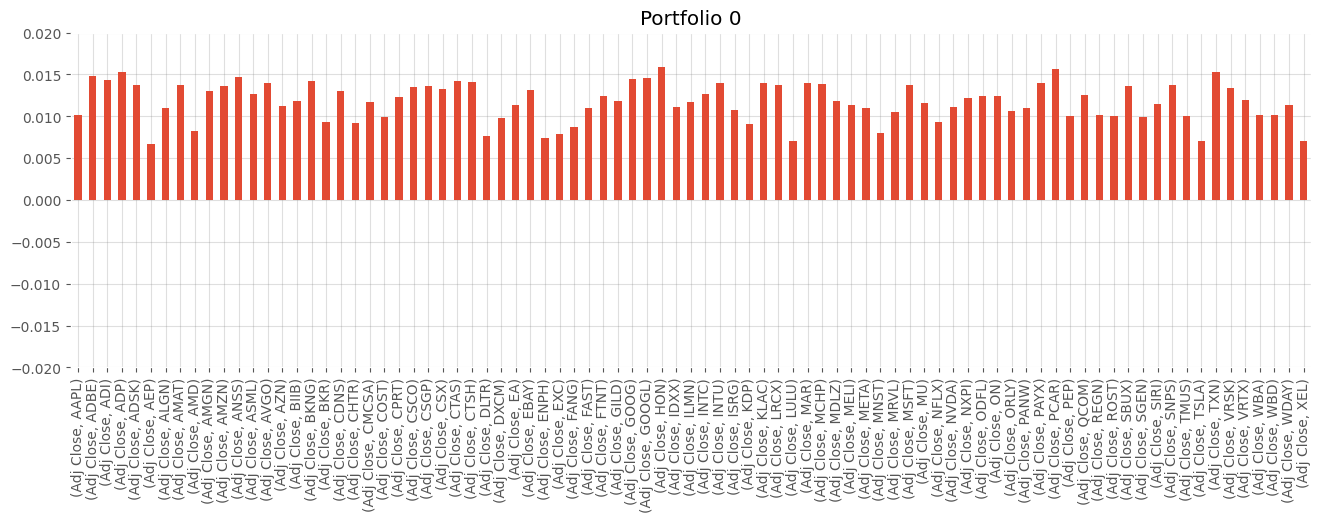

In [15]:
## Eigenportfolio#0 is not properly plotted due to lower y-values, replot using different scale
(
    eigen_portfolios.iloc[0]
    .T  # Transpose the DataFrame to have portfolios as columns and assets as rows
    .plot
    .bar(subplots = True,
         layout = (int(NumComponents), 1),
         legend = False,
         sharey = True,
         figsize = [16, 20],
         ylim = [-0.02, 0.02]
         )
)

In [16]:
def calculate_sharpe_ratio(ts_returns, periods_per_year = 252):

    n_years = ts_returns.shape[0] / periods_per_year

    annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
                                ) - 1

    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)

    annualized_sharpe = annualized_return / annualized_vol

    if annualized_sharpe > 10:
        annualized_return = 0
        annualized_vol = 0
        annualized_sharpe = 0

    return annualized_return, annualized_vol, annualized_sharpe


# Gift

def recommend_optimal_portfolio():

    # Number of eigenportfolios or principal components
    
    n_portfolios = len(pca.components_[:4])

    # Initialize arrays for annualized return, volatility, and Sharpe ratio of each eigenportfolio
    
    annualized_ret = np.array([0.] * n_portfolios)

    sharpe_metric = np.array([0.] * n_portfolios)

    annualized_vol = np.array([0.] * n_portfolios)

    # Variable to track the index of the eigenportfolio with the highest Sharpe ratio
    
    highest_sharpe = 0

    # Extract stock tickers from the scaled data
    
    stock_tickers =\
    (scaled_stock_data
     .columns 
     .values)

    n_tickers = len(stock_tickers)

    # Extract principal components
    
    PCs = pca.components_

    # Loop through each eigenportfolio

    for i in range(n_portfolios):

        # Normalize the weights of the i-th eigenportfolio
        
        pc_w = PCs[i] / sum(PCs[i])

        # Create a DataFrame for the eigenportfolio weights
        
        eigen_prtfi =\
            (
                pd
                .DataFrame(data = {"weights": pc_w.squeeze() * 100},
                           index = stock_tickers)
            )

        # Calculate returns for the eigenportfolio
        
        eigen_prtfi.sort_values(by = ["weights"],
                                ascending = False,
                                inplace = True)

        eigen_prti_returns =\
            (
                np
                .dot(X_Train_Raw.loc[ : , eigen_prtfi.index],
                     pc_w)
            )

        eigen_prti_returns =\
            (
                pd
                .Series(eigen_prti_returns.squeeze(),
                        index = X_Train_Raw.index)
            )

        # Calculate annualized return, volatility, and Sharpe ratio for the eigenportfolio
        
        er, vol, sharpe = calculate_sharpe_ratio(eigen_prti_returns)

        # Store the metrics in their respective arrays
        
        annualized_ret[i] = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe

        # Replace NaN values in Sharpe metric array with zeros
        
        sharpe_metric = np.nan_to_num(sharpe_metric)

    # Let's find a portfolio with the HIGHEST Sharpe Ratio

    highest_sharpe = np.argmax(sharpe_metric)

    # Print the details of the eigenportfolio with the highest Sharpe ratio
    
    print("Our Eigen Portfolio #%d with the highest Sharpe\
           \nReturn %.2f%%,\vol = %.2f%%, \nSharpe = %.2f" %
         (highest_sharpe,
          annualized_ret[highest_sharpe] * 100,
          annualized_vol[highest_sharpe] * 100,
          sharpe_metric[highest_sharpe]
         )
         )

    # Create a DataFrame to store the results for all eigenportfolios
    
    results =\
        (
            pd
            .DataFrame(data = {"Return": annualized_ret,
                               "Vol": annualized_vol,
                               "Sharpe": sharpe_metric}
                      )
        )

    results.dropna(inplace = True)

    results.sort_values(by = ["Sharpe"],
                        ascending = False,
                        inplace = True)

    # Print the top 10 eigenportfolios based on Sharpe ratio

    print(results.head(10)
         )

In [17]:
recommend_optimal_portfolio()

Our Eigen Portfolio #0 with the highest Sharpe           
Return 27.90%,ol = 11.36%, 
Sharpe = 2.46
     Return       Vol    Sharpe
0  0.278951  0.113559  2.456441
2  1.150110  0.529362  2.172633
1  0.417443  0.595689  0.700773
3  0.154093  0.597865  0.257739


In [18]:
def FindPortfolioVisual():

    #set length
    n_portfolios = len(pca.components_[0:10])
    
    annualized_ret = np.array([0.] * n_portfolios)
    
    sharpe_metric = np.array([0.] * n_portfolios)
    
    annualized_vol = np.array([0.] * n_portfolios)
    
    highest_sharpe = 0
    
    stock_tickers = scaled_stock_data.columns.values
    
    n_tickers = len(stock_tickers)
    
    PCs = pca.components_
    
    for i in range(n_portfolios):
        
        pc_w = PCs[i] / sum(PCs[i]
                           )
        
        eigen_prtfi = pd.DataFrame(data = {"weights": pc_w.squeeze()*100}, 
                                   index = stock_tickers)
        
        eigen_prtfi.sort_values(by = ["weights"],
                                ascending = False,
                                inplace = True)
        
        eigen_prti_returns = np.dot(X_Train_Raw.loc[:, eigen_prtfi.index], 
                                    pc_w)
        
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(),
                                       index = X_Train_Raw.index)
        
        er, vol, sharpe = calculate_sharpe_ratio(eigen_prti_returns)
        
        annualized_ret[i] = er
        
        annualized_vol[i] = vol
        
        sharpe_metric[i] = sharpe
        
        sharpe_metric = np.nan_to_num(sharpe_metric)
        
    # HOW TO FIND A PORTFOLIO with the HIGHEST Sharpe Ratio
    
    highest_sharpe = np.argmax(sharpe_metric)
    
    print("Our Eigen Portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f" %
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100,
           annualized_vol[highest_sharpe]*100,
           sharpe_metric[highest_sharpe]
          )
         )
        
    #####
    
    fig, ax = plt.subplots()
    
    fig.set_size_inches(16, 6)
    
    ax.plot(sharpe_metric, 
            linewidth = 2)
    
    ax.set_title("Sharpe Ratio of Eigen-Portfolios")
    
    ax.set_ylabel("Sharpe Ratio")
    
    ax.set_xlabel("Portfolios")
    
    #####
        
    results = pd.DataFrame(data = {"Return": annualized_ret, "Vol": annualized_vol, "Sharpe": sharpe_metric}
                           )
    
    results.dropna(inplace = True)
    
    results.sort_values(by = ["Sharpe"],
                        ascending = False,
                        inplace = True)
    
    print(results.head(15)
         )
    
    plt.show()

Our Eigen Portfolio #0 with the highest Sharpe. Return 27.90%, vol = 11.36%, Sharpe = 2.46
     Return       Vol    Sharpe
0  0.278951  0.113559  2.456441
2  1.150110  0.529362  2.172633
7  0.509844  0.342444  1.488839
1  0.417443  0.595689  0.700773
3  0.154093  0.597865  0.257739
9  0.078503  0.573866  0.136797
5 -0.002314  0.283708 -0.008155
4 -0.261691  0.757692 -0.345379
6 -0.212871  0.368461 -0.577731
8 -0.595287  0.859420 -0.692662


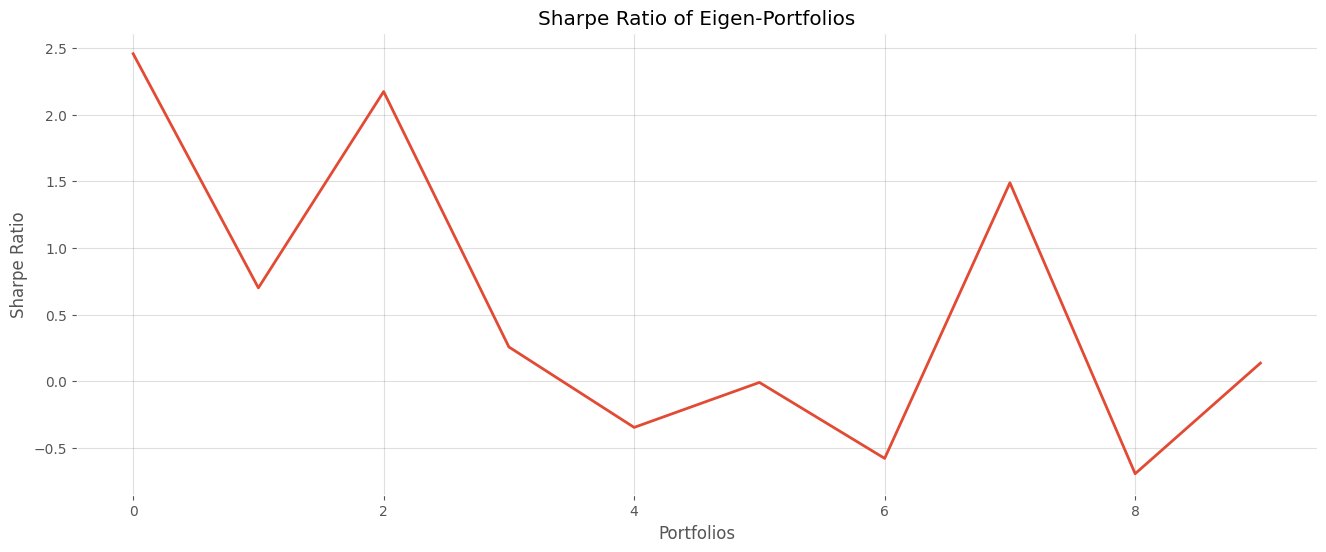

In [19]:
FindPortfolioVisual()

In [25]:
# Yet another gift

def backtest_PCA_porfolios(eigen):

    eigen_prtfi =\
        (
            pd
            .DataFrame(data = {"weights": eigen.squeeze()
                              },
                       index = stock_tickers)
        )

    # eigen_prtfi.sort_values(by = ["weights"],
    #                         ascending = False,
    #                         inplace = True)

    eigen_prtfi_returns =\
    (
        np
        .dot(X_Test_Raw
             .loc[ : , eigen_prtfi.index],
             eigen)
    )

    eigen_portfolio_returns =\
    (
        pd
        .Series(eigen_prtfi_returns.squeeze(),
                index = X_Test_Raw.index)
    )

    returns, vol, sharpe = calculate_sharpe_ratio(eigen_portfolio_returns)

    print("Our PCA-based Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f"  %
          (returns * 100, vol * 100, sharpe)
         )

    # Compared with what? Equal-weightage Portfolio

    equal_weight_return =\
    (
        X_Test_Raw * (1 / len(pca.components_)
                     )
    ).sum(axis = 1)

    df_plot =\
        (
            pd
            .DataFrame({"ML Portfolio Return": eigen_portfolio_returns,
                        "Equal Weight Index": equal_weight_return},
                      index = X_Test.index
                      )
        )

    (
        np
        .cumprod(df_plot + 1)
        .plot(title = "Returns of the equal weighted index vs. Eigen-Portfolio",
              figsize = [16, 8]
             )
    )

    plt.show()

Our PCA-based Portfolio:
Return = 61.38%
Volatility = 11.69%
Sharpe = 5.25


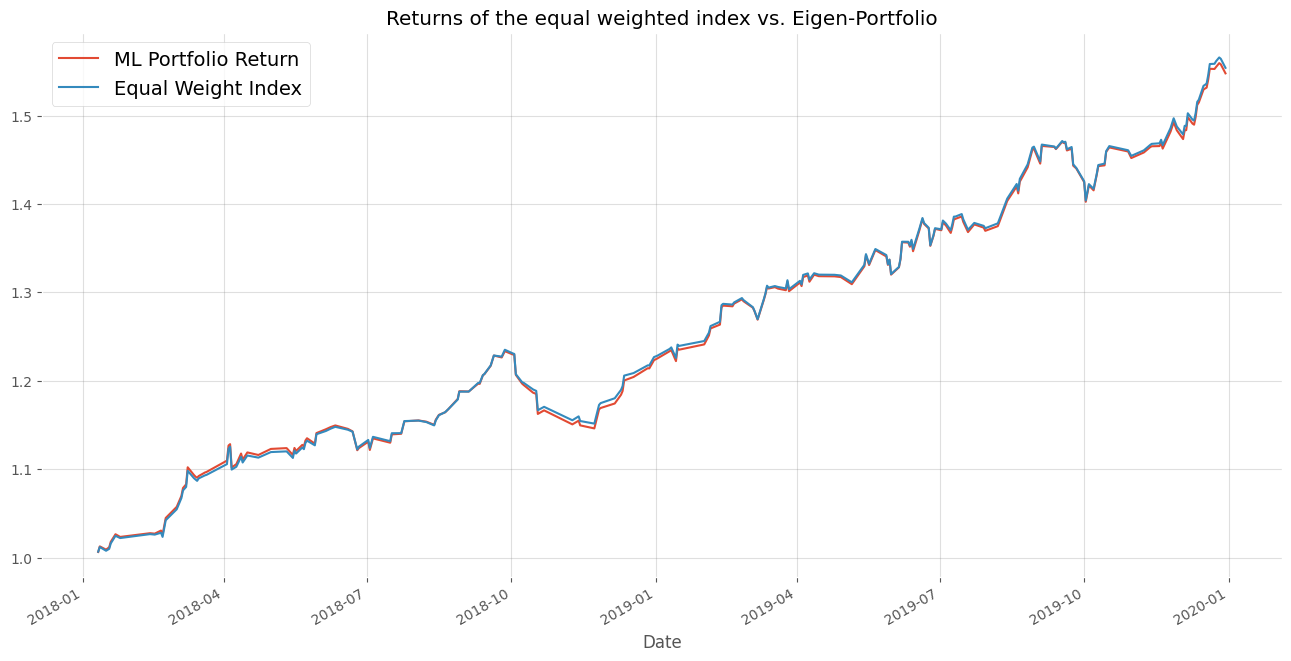

In [21]:
backtest_PCA_porfolios(eigen = weights[0]
                      )

Our PCA-based Portfolio:
Return = -17.42%
Volatility = 115.78%
Sharpe = -0.15


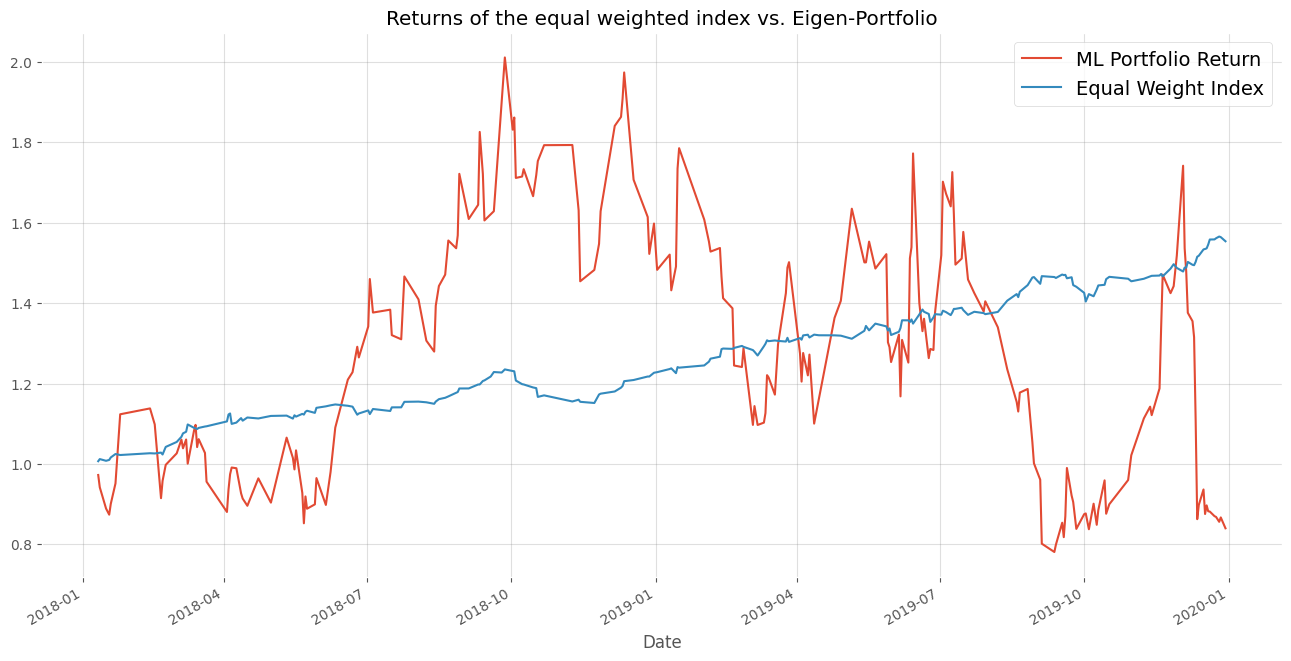

In [26]:
backtest_PCA_porfolios(eigen = weights[2]
                      )

Our PCA-based Portfolio:
Return = 201.12%
Volatility = 44.56%
Sharpe = 4.51


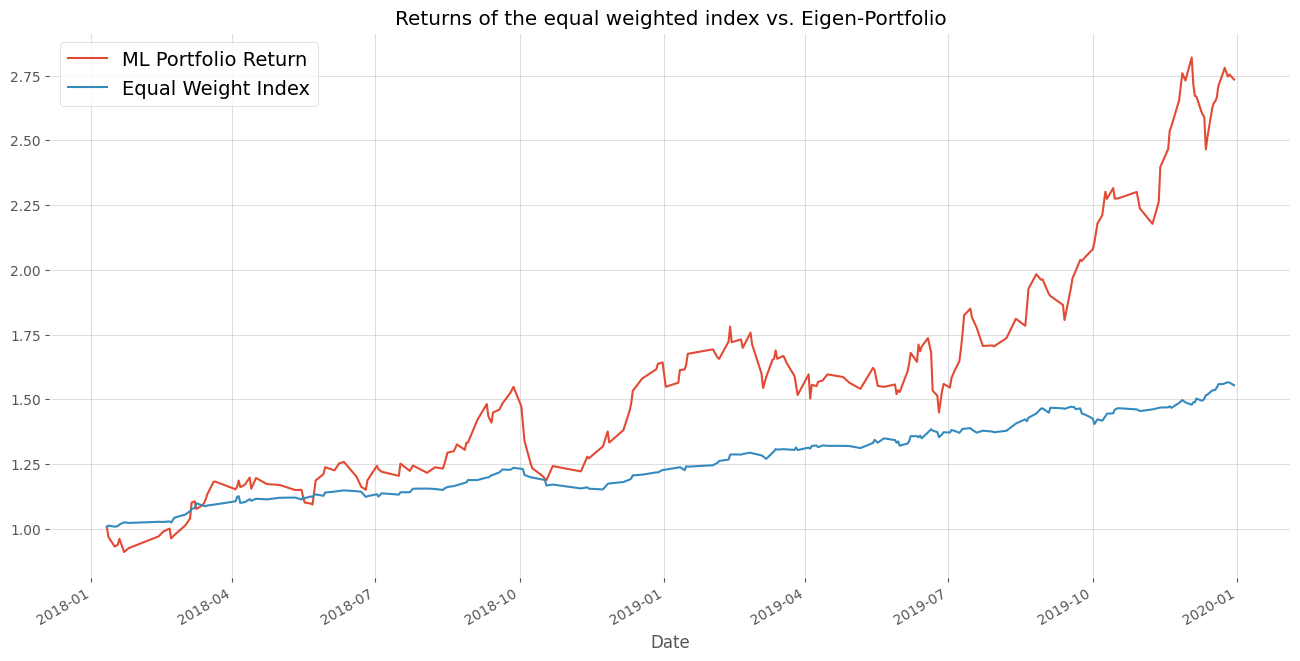

In [27]:
backtest_PCA_porfolios(eigen = weights[7]
                      )

# Supervised Learning

In [76]:
# Loading Algorithm

from sklearn.linear_model import LinearRegression

# Regularization
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# ENSEMBLE

## Bagging
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

## Boosting
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Support Vector Machine
from sklearn.svm import SVR

# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor

# Multi-layer Perceptron (Neural Networks)
from sklearn.neural_network import MLPRegressor

# for data split
from sklearn.model_selection import train_test_split

# for cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# for assessment
from sklearn.metrics import mean_squared_error

# for Feature Selection
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import SelectKBest

# for time series models
import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm

#for data preparation and visualization
from pandas.plotting import scatter_matrix

# for Pre-processing (Feature Engineering)
from sklearn.preprocessing import StandardScaler

# assumption checks for Time-Series
from statsmodels.graphics.tsaplots import plot_acf

In [86]:
stock_ticker = ["NFLX","META", "AAPL", "AMZN", "GOOGL"]

currency_ticker = ["DEXJPUS", "DEXUSUK"]

index_ticker = ["SP500", "DJIA", "VIXCLS"]


# Dates
start_date = dt.datetime(2003, 1, 1)
end_date = dt.datetime(2019, 12, 31)

stock_df = pdr.get_data_yahoo(stock_ticker, start = start_date, end = end_date)
currency_df = pdr.get_data_fred(currency_ticker,  start = start_date, end = end_date)
index_df = pdr.get_data_fred(index_ticker,  start = start_date, end = end_date)

[*********************100%%**********************]  5 of 5 completed


In [103]:
return_period = 5

Y =\
    (np
     .log(stock_data.loc[ : , ("Adj Close", "NFLX")]
         )
     .diff(return_period)
     .shift(-return_period)
    )

Y.name =\
    (Y
     .name[-1]
     +
     "_pred")

X1 =\
    (np.
     log(stock_data.loc[ : , ("Adj Close", ("META", "AAPL", "AMZN", "GOOGL")
                             )
                       ]
        )
     .diff(return_period)
    )

X1.columns =\
    (X1
     .columns
     .droplevel()
    )

X2 =\
    (np
     .log(currency_data)
     .diff(return_period)
    )

X3 =\
    (np
     .log(index_data)
     .diff(return_period)
    )

X4 =\
    (
    pd
    .concat([np
             .log(stock_data.loc[ : , ("Adj Close", "NFLX")
                                ]
                 )
             .diff(i) for i in [return_period, 
                                return_period * 3, 
                                return_period * 6, 
                                return_period * 12]
            ],
           axis = 1
           )
    .dropna()
)

X4.columns = ["NFLX_DT", "NFLX_3DT", "NFLX_6DT", "NFLX_12DT"]

X5 = (pd.concat(
    [
        stock_data.loc[:, ("Adj Close", "NFLX")].rolling(window=21).mean(),
        stock_data.loc[:, ("Adj Close", "NFLX")].rolling(window=63).mean(),
        stock_data.loc[:, ("Adj Close", "NFLX")].rolling(window=252).mean(),
        stock_data.loc[:, ("Adj Close", "NFLX")].ewm(span=10).mean(),
        stock_data.loc[:, ("Adj Close", "NFLX")].ewm(span=30).mean(),
        stock_data.loc[:, ("Adj Close", "NFLX")].ewm(span=200).mean()
    ], axis=1)
      .dropna()
      )

X5.columns = ['SMA_21', 'SMA_63', 'SMA_252', 'EMA_10', 'EMA_30', 'EMA_200']

## RSI

In [104]:
def RSI_strategy(stock_data,win):
    # Calculate RSI

    stock_data["diff"] = stock_data["Adj Close"].diff()

    stock_data["gain"] = np.where(stock_data["diff"] > 0, stock_data["diff"], 0)
    stock_data["loss"] = np.where(stock_data["diff"] < 0, -stock_data["diff"], 0)
    stock_data["gain_av"] = stock_data["gain"].rolling(window=win).mean()
    stock_data["loss_av"] = stock_data["loss"].rolling(window=win).mean()

    stock_data["RS"] = stock_data["gain_av"] / stock_data["loss_av"]

    stock_data["RSI"] = 100 - (100 / (1 + stock_data["RS"]))

    return stock_data["RSI"]

In [105]:
df = pdr.get_data_yahoo('NFLX', start = start_date, end = end_date)

# X6 RSI values for 10-day, 30-day and 200-day of NLFX
X6 = (pd.concat(
    [
        RSI_strategy(df, 10),
        RSI_strategy(df, 30),
        RSI_strategy(df, 200)
    ], axis=1)
    .dropna()
)

X6.columns = ['RSI_10', 'RSI_30', 'RSI_200']

[*********************100%%**********************]  1 of 1 completed


## Rate of change

In [106]:
# X7 Rate of Change values for 10-day, 30-day of NLFX
X7 = (pd.concat(
    [
        df['Adj Close'].shift(9) - df['Adj Close'] / df['Adj Close'],
        df['Adj Close'].shift(29) - df['Adj Close'] / df['Adj Close']
    ], axis=1)
    .dropna()
)

X7.columns = ['ROC_10', 'ROC_30']

## Training Set

In [107]:
X=\
(
    pd
    .concat([X1, X2, X3, X4, X5, X6, X7],
            axis = 1)
)

data =\
(
pd
.concat([Y, X],
        axis = 1)
.dropna()
.iloc[ : :return_period, :]
)

Y = data.loc[ : , Y.name]
X = data.loc[ : , X.columns]

In [108]:
#testing set
validation_size = 0.25

train_size =\
    int(len(X) 
        * 
        (1 - validation_size)
       )

X_train, X_test =\
    (X[0         :train_size], 
     X[train_size:len(X)    ]
    )

Y_train, Y_test =\
    (Y[0         :train_size], 
     Y[train_size:len(X)    ]
    )

In [109]:
num_folds = 10
seed = 231023
scoring = "neg_mean_squared_error"

models = []

models.append(("LR", LinearRegression()
             )
            )

models.append(("LASSO", Lasso()
             )
            )

models.append(("EN", ElasticNet()
             )
            )

models.append(("CART", DecisionTreeRegressor()
             )
            )

models.append(("KNN", KNeighborsRegressor()
             )
            )

models.append(("SVR", SVR()
             )
            )

# Bagging (Boostrap Aggregation)

models.append(("RFR", RandomForestRegressor()
              )
             )

models.append(("ETR", ExtraTreesRegressor()
              )
             )

# Boosting

models.append(("GBR", GradientBoostingRegressor()
              )
             )

models.append(("ABR", AdaBoostRegressor()
              )
             )

# Alternatives
## light GMB
## CAT Boost

In [110]:
### Initialization of Lists:

names = []

kfold_results = []

train_results = []
test_results = []

for name, model in models:
    
### Appending Model Names:

# The name of the current model is appended to the names list.

    names.append(name)
    
### Let's run K-fold Cross-Validation
    
    kfold =\
        (KFold(n_splits = num_folds,
               random_state = seed,
               shuffle = True)
        )
    
# A KFold object is created with a specified number of splits (num_folds), 
# a random seed (seed), 
# and shuffling enabled.
    
### Running Cross-Validation:
# Let's convert MSE to positive (Here, now it becomes lower the better; See below)

    cv_results =\
        (
         -1
         *
         cross_val_score(model, X_train, Y_train,
                         cv = kfold,
                         scoring = scoring)
        )
        
# Cross-validation is performed on the training data (X_train, Y_train) using the current model. 
# The negative mean squared error is used 
# as the scoring metric 
# (hence multiplied by -1 to make it positive, 
# as the convention is that higher scores are better).

# Storing Cross-Validation Results:
 
### The cross-validation results for the current model are appended to the kfold_results list.    
    
    kfold_results.append(cv_results)

# Fitting the Model on the Entire Training Set:
  
    res = model.fit(X_train, Y_train) # The model is trained on the entire training dataset.

### Evaluating Model on Training Set:

# The trained model’s predictions on the training set are evaluated 
# using the mean squared error, and the result is appended to train_results.

    train_result = mean_squared_error(res.predict(X_train), Y_train)
    
    train_results.append(train_result)

## Evaluating Model on Testing Set:    
    
# Similarly, the model’s performance is evaluated 
# on the testing set and appended to test_results.
    
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    
    test_results.append(test_result)
    
# Printing the Results:

# The name of the model, 
# the average cross-validation score, 
# the standard deviation of the cross-validation scores, 
# the training set performance, 
# and the testing set performance are printed out.

    message = "%s: %f (%f) %f %f" % (name, cv_results.mean(), 
                                     cv_results.std(), 
                                     train_result, 
                                     test_result)
    print(message)

LR: 0.008877 (0.006543) 0.000934 0.004005
LASSO: 0.003320 (0.002669) 0.003272 0.003537
EN: 0.003323 (0.002666) 0.003264 0.003533
CART: 0.006677 (0.004902) 0.000000 0.006248
KNN: 0.003208 (0.002509) 0.002215 0.002515
SVR: 0.004118 (0.002265) 0.003610 0.003734
RFR: 0.003726 (0.003350) 0.000566 0.002952
ETR: 0.003773 (0.003747) 0.000000 0.002899
GBR: 0.004630 (0.003741) 0.000000 0.002707
ABR: 0.004147 (0.004116) 0.000357 0.003176


In [111]:
# Basic Set-up for ARIMA

X_train_ARIMA =\
    (X_train
    .loc[ : , ["META", "AAPL", "AMZN", "GOOGL", "DEXJPUS", "SP500", "DJIA", "VIXCLS"]]
   )

X_test_ARIMA =\
    (X_test
    .loc[ : , ["META", "AAPL", "AMZN", "GOOGL", "DEXJPUS", "SP500", "DJIA", "VIXCLS"]]
)    

train_len = len(X_train_ARIMA)
test_len = len(X_test_ARIMA)
total_len = len(X)

modelARIMA =\
(    stats
     .ARIMA(endog = Y_train,
                exog = X_train_ARIMA,
                order = [1, 0, 0]
            )
)

model_fit = modelARIMA.fit()

error_training_ARIMA =\
(    mean_squared_error(Y_train,
                       model_fit.fittedvalues)
)

predicted =\
(
    model_fit
    .predict(start = train_len - 1,
             end = total_len - 1,
             exog = X_test_ARIMA)[1: ]
)

error_testing_ARIMA =\
(    mean_squared_error(Y_test,
                        predicted)
)

error_testing_ARIMA

test_results.append(error_testing_ARIMA)

train_results.append(error_training_ARIMA)

names.append("ARIMA")

C:\Users\bryan\OneDrive\Desktop\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\bryan\OneDrive\Desktop\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\bryan\OneDrive\Desktop\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\bryan\OneDrive\Desktop\python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maxi

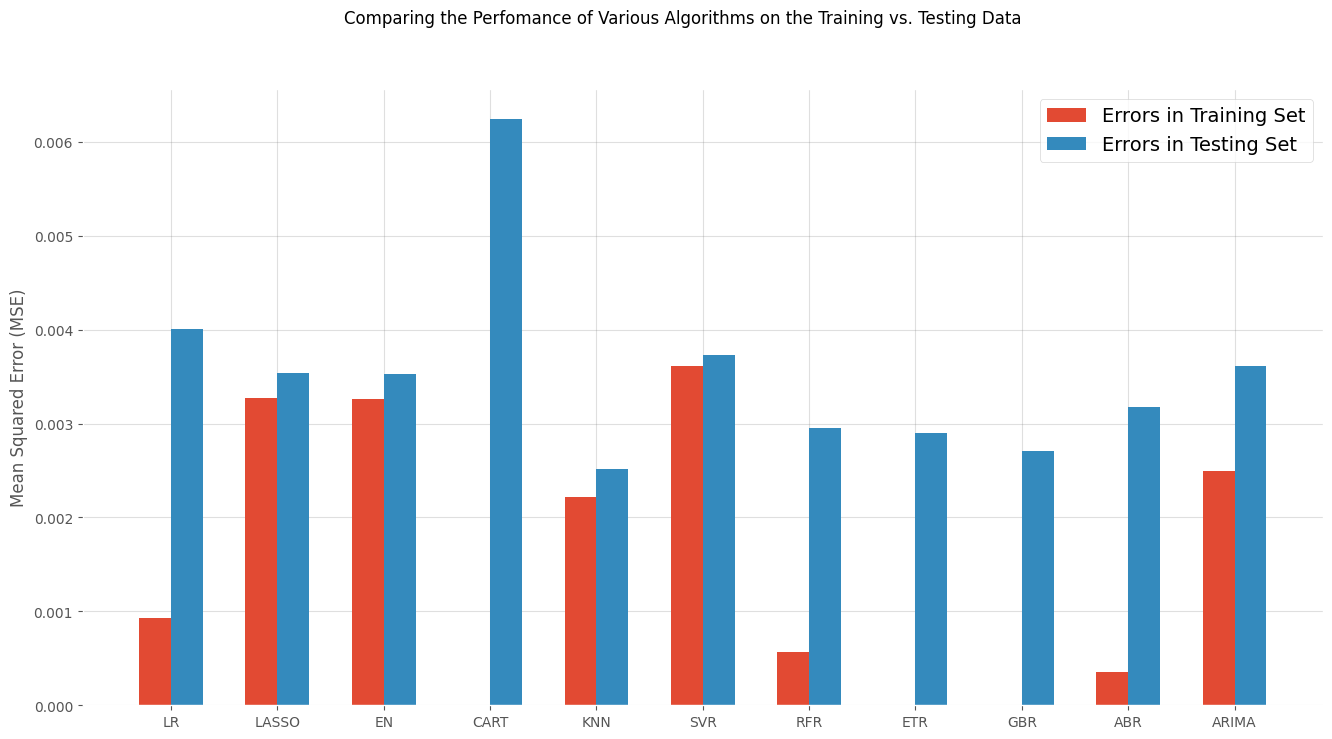

In [112]:
fig = plt.figure(figsize = [16, 8])

ind = np.arange(len(names)
               )

width = 0.30

fig.suptitle("Comparing the Perfomance of Various Algorithms on the Training vs. Testing Data")

ax = fig.add_subplot(111)

(plt
 .bar(ind - width/2,
    
      # Team, this line calculates the starting x position of the bars 
      # representing "Errors in Training Set". 
      # The width/2 term is used to shift the bars to the left, 
      # so they are centered around the tick mark for each group (algorithm) on the x-axis.
      
      # The bar chart will have two sets of bars for each algorithm: 
      # one for training errors and one for testing errors. 
      
      # By subtracting width/2 from ind, 
      # the training error bars are positioned to the left of the center of the tick marks. 
      
      train_results,
      width = width,
      label = "Errors in Training Set")
)

(plt
 .bar(ind + width/2,
      test_results,
      width = width,
      label = "Errors in Testing Set")
)

plt.legend()

ax.set_xticks(ind)
ax.set_xticklabels(names)

plt.ylabel("Mean Squared Error (MSE)")

plt.show()

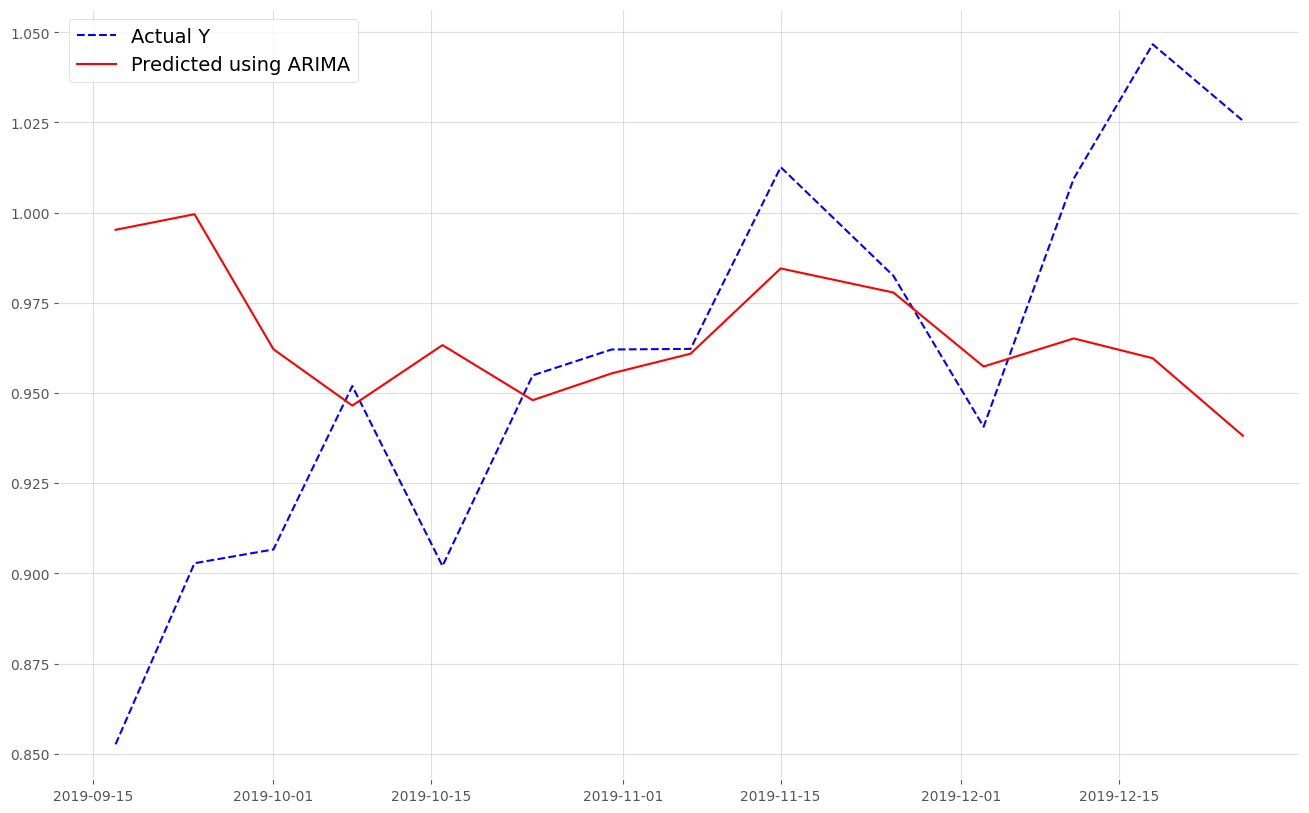

In [113]:
plt.figure(figsize = (16, 10)
           )

predicted.index = Y_test.index

plt.plot(np.exp(Y_test).cumprod(), "b--", label = "Actual Y")

plt.plot(np.exp(predicted).cumprod(), "r", label = "Predicted using ARIMA")

plt.legend()
plt.show()

# clustering / Pairs Trading

In [115]:
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation, DBSCAN
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold

In [120]:
dataset = pd.read_csv("sp500.csv", 
                   index_col =0)

In [124]:
missing_fractions = \
    dataset \
    .isnull() \
    .mean() \
    .sort_values(ascending = False)

drop_list =\
    sorted(list(missing_fractions
                [missing_fractions > 0.3]
                .index)
           )

dataset =\
    dataset \
    .drop(labels= drop_list, 
          axis=1)

dataset = dataset.fillna(method = "ffill")

returns =\
(
    dataset
    .pct_change()
    .mean() 
    * 252
)

returns = pd.DataFrame(returns)
returns.columns = ["Returns"]

returns["Volatility"] =\
(    
     dataset
    .pct_change()
    .std() 
    * np.sqrt(252)
)

data = returns

data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

In [125]:
scaler = StandardScaler().fit(data)
rescaledDataset = pd.DataFrame(scaler.fit_transform(returns),columns = returns.columns, index = returns.index)
X = rescaledDataset
X

,Returns,Volatility
ABT,0.794067,-0.702741
ABBV,-0.927603,0.794867
ABMD,-0.054463,2.796251
ACN,0.405155,-0.802003
ATVI,-0.409875,1.495648
...,...,...
XYL,0.277667,-0.351776
YUM,0.856756,-1.308305
ZBH,0.144690,-0.519879
ZION,-0.568698,-0.177625


## Clustering

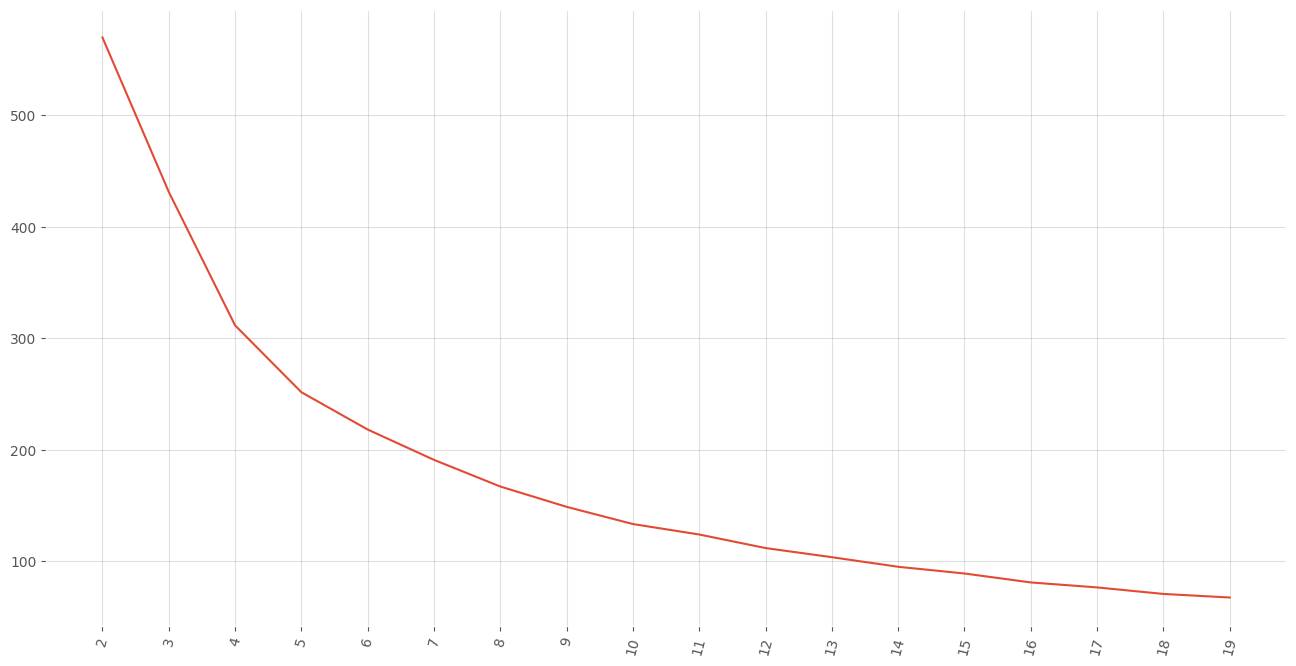

In [126]:
distorsions = []

max_loop = 20

for k in range(2, max_loop):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(16, 8))

plt.plot(range(2, max_loop), distorsions)

plt.xticks([i for i in range(2, max_loop)], 
           rotation=75)

plt.grid(True)

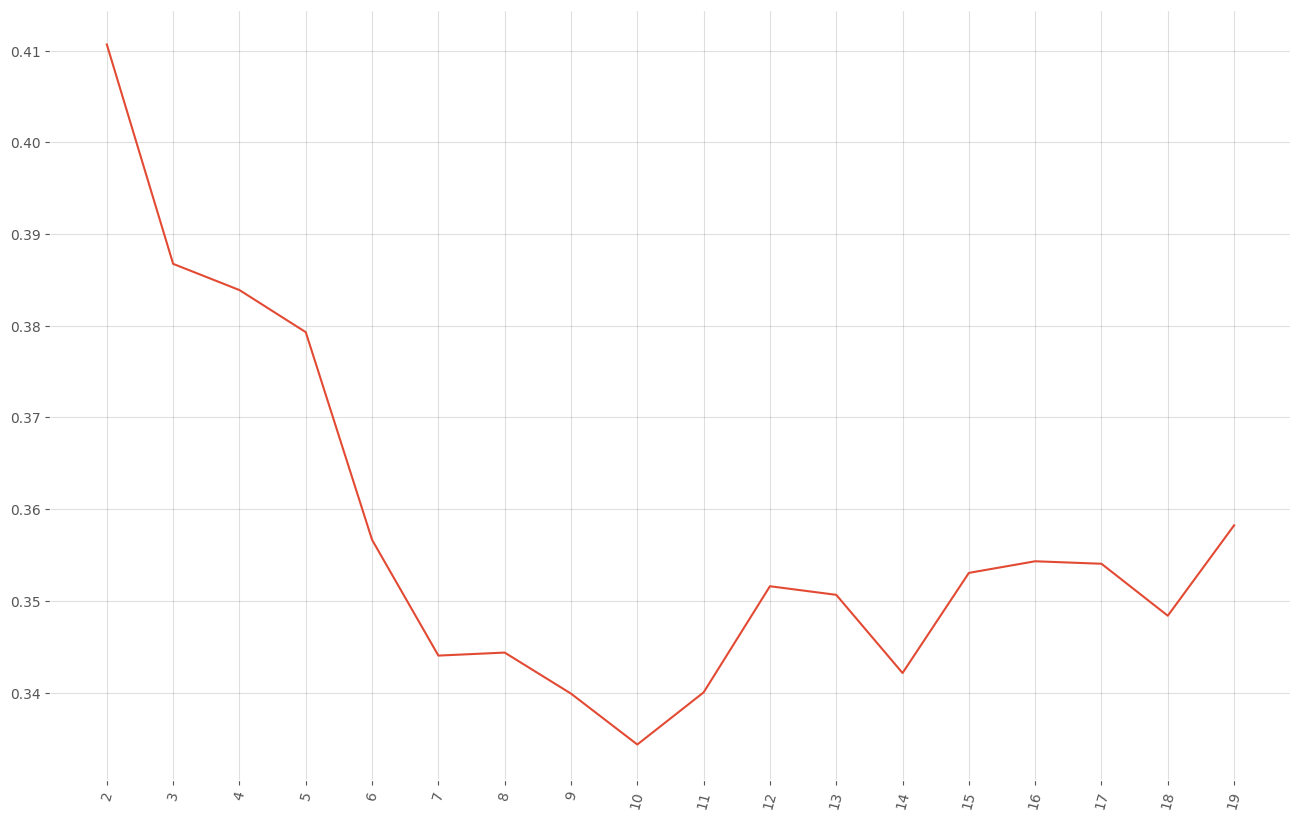

In [127]:
silhouette_score = []

for k in range(2, max_loop):
        kmeans = KMeans(n_clusters = k,  
                        random_state = 10, 
                        n_init = 10)
        kmeans.fit(X)        
        silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state=10)
                               )
        
fig = plt.figure(figsize=(16, 10)
                )

plt.plot(range(2, max_loop), silhouette_score)

plt.xticks([i for i in range(2, max_loop)], 
           rotation=75)

plt.grid(True)

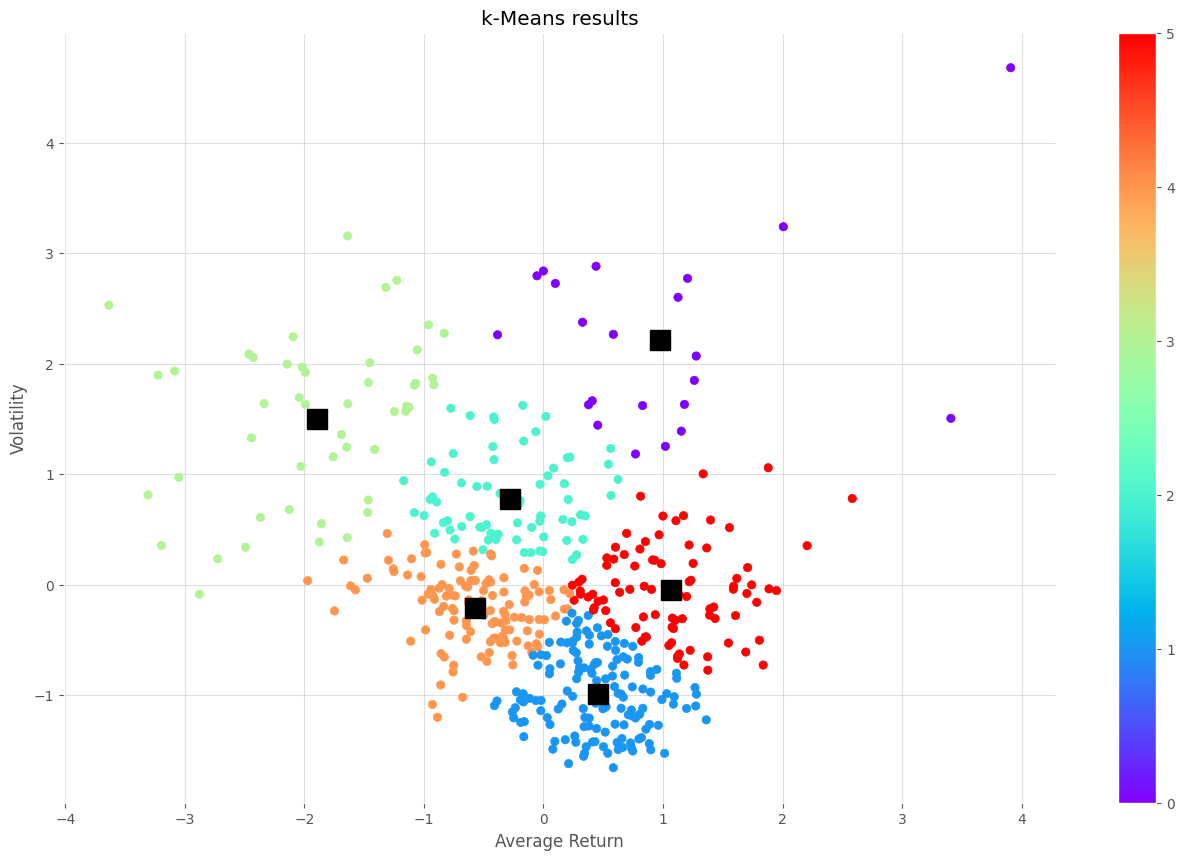

In [128]:
nclust = 6
# Fit with k-means
k_means = cluster.KMeans(n_clusters=nclust)
k_means.fit(X)

# Extracting labels 

target_labels = k_means.predict(X)
target_labels

centroids = k_means.cluster_centers_

fig = plt.figure(figsize=(16,10)
                )

ax = fig.add_subplot(111)

scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c = k_means.labels_, cmap = "rainbow", label = X.index)

ax.set_title("k-Means results")
ax.set_xlabel("Average Return")
ax.set_ylabel("Volatility")

plt.colorbar(scatter)

plt.plot(centroids[:,0], centroids[:,1], 'sg', markersize=15, color = "black")

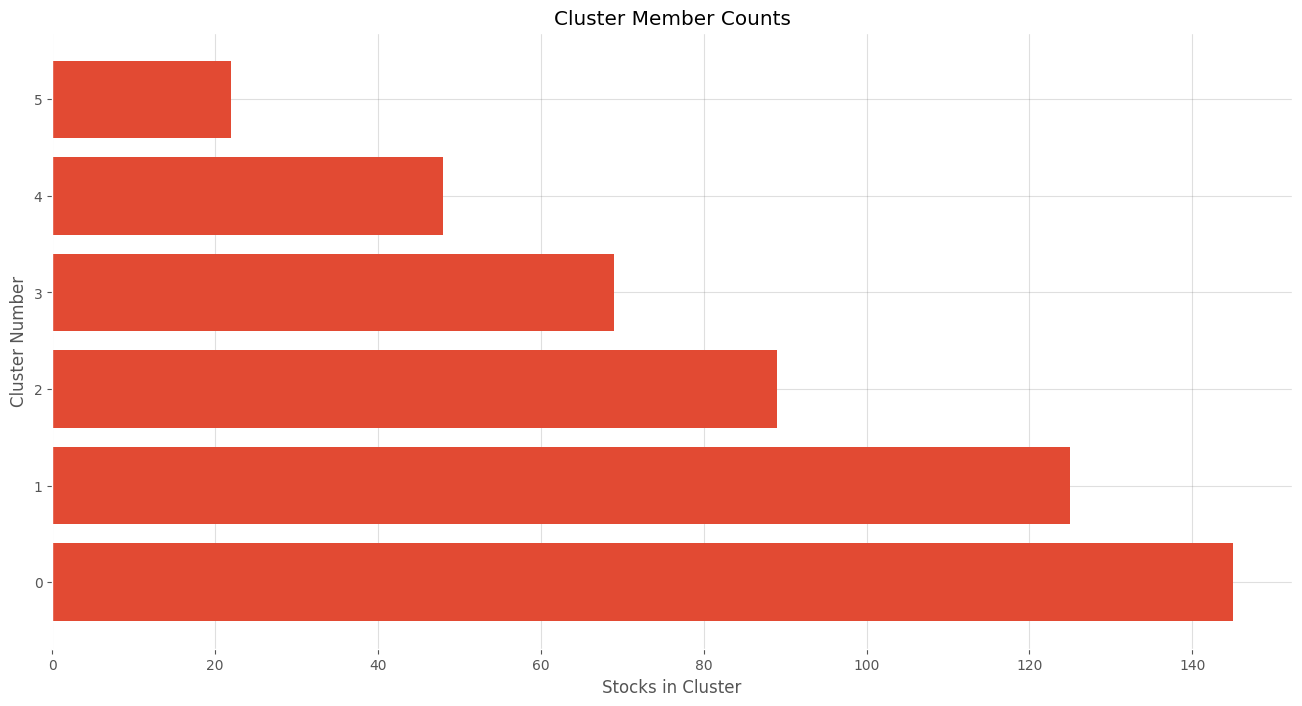

In [129]:
# show number of stocks in each cluster

clustered_series =\
(
    pd
    .Series(index = X.index, 
            data = k_means
                   .labels_
                   .flatten()
            )
)

# clustered stock with its cluster label
clustered_series_all = pd.Series(index=X.index, data=k_means.labels_.flatten()
                                )

clustered_series = clustered_series[clustered_series != -1]

plt.figure(figsize=(16,8)
          )

plt.barh(
    range(len(clustered_series.value_counts()
             )
         ), # cluster labels, y axis
    clustered_series.value_counts()
)

plt.title('Cluster Member Counts')
plt.xlabel('Stocks in Cluster')
plt.ylabel('Cluster Number')

plt.show()

## Hierarchical Clustering

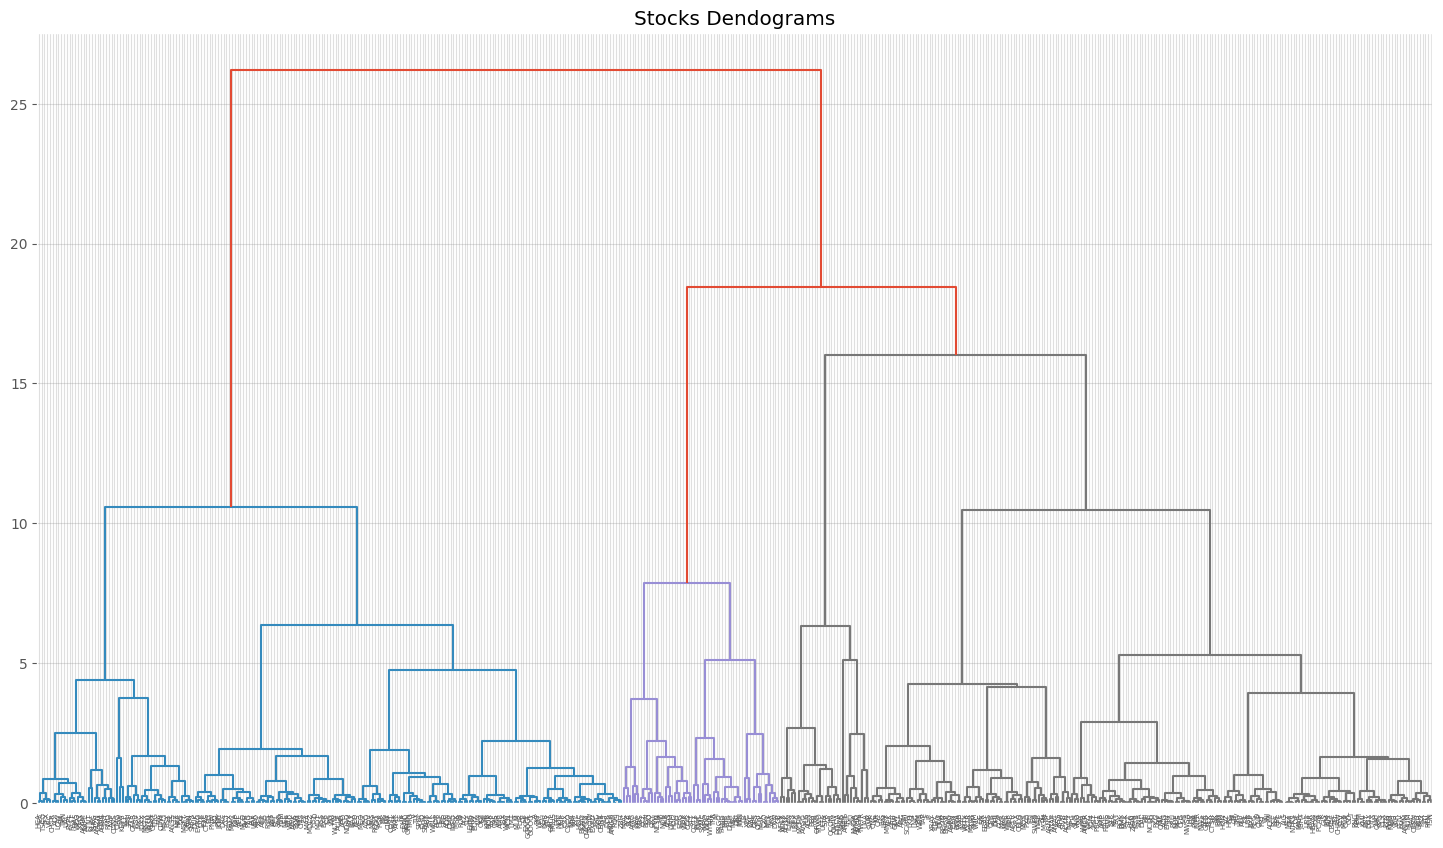

In [131]:
#Calulate linkage
Z = linkage(X, 
            method = "ward")
Z[0]

# Plot Dendogram

plt.figure(figsize=(18, 10)
          )
plt.title("Stocks Dendograms")

dendrogram(Z, labels = X.index)

plt.show()

In [132]:
distance_threshold = 13

clusters = fcluster(Z, distance_threshold, criterion='distance')

chosen_clusters = pd.DataFrame(data=clusters, 
                               columns=['cluster']
                              )

chosen_clusters['cluster'].unique()

array([1, 4, 3, 2])

In [133]:
nclust = 4

hc = AgglomerativeClustering(n_clusters = nclust, 
                             affinity = "euclidean", 
                             linkage = "ward")

clust_labels1 = hc.fit_predict(X)

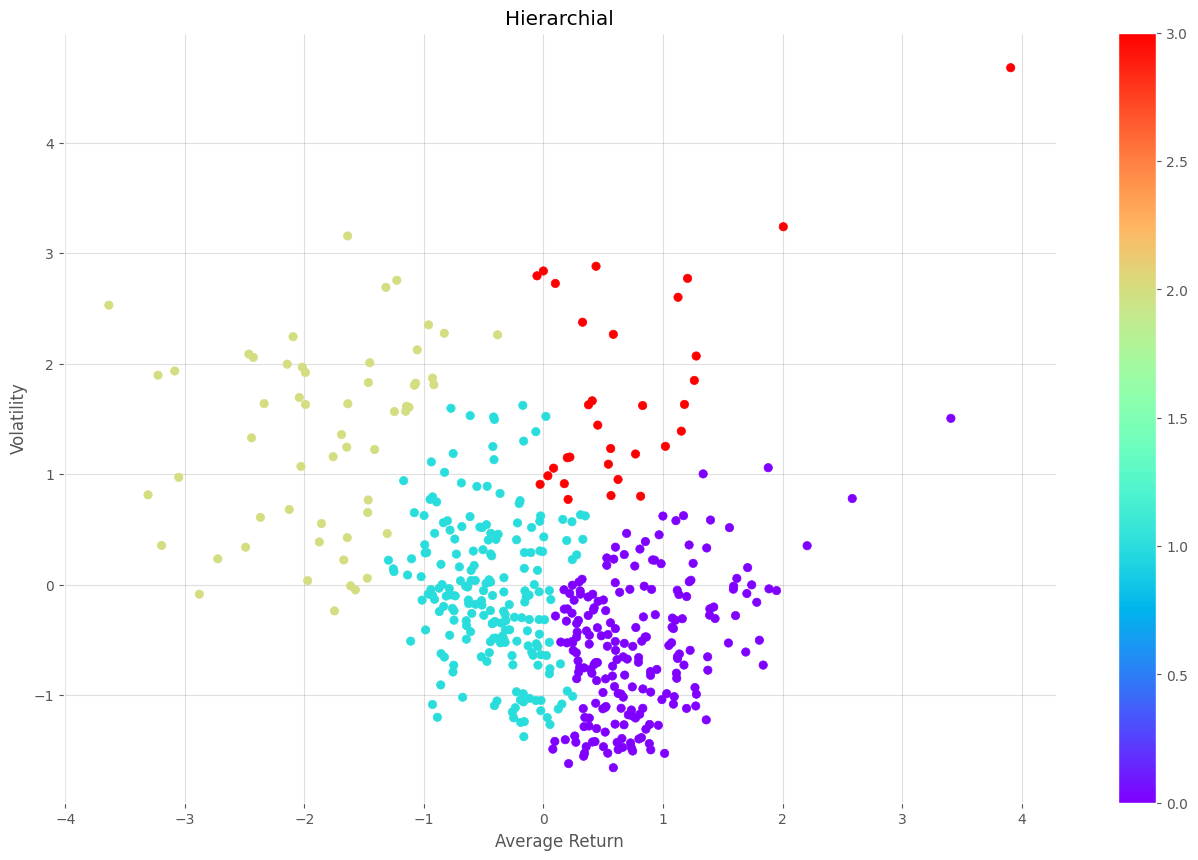

In [134]:
fig = plt.figure(figsize=(16,10)
                )

ax = fig.add_subplot(111)

scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c = clust_labels1, cmap = "rainbow")

ax.set_title("Hierarchial")
ax.set_xlabel("Average Return")
ax.set_ylabel("Volatility")

plt.colorbar(scatter)

## Affinity Propagation

In [135]:
ap = AffinityPropagation()

ap.fit(X)

clust_labels2 = ap.predict(X)

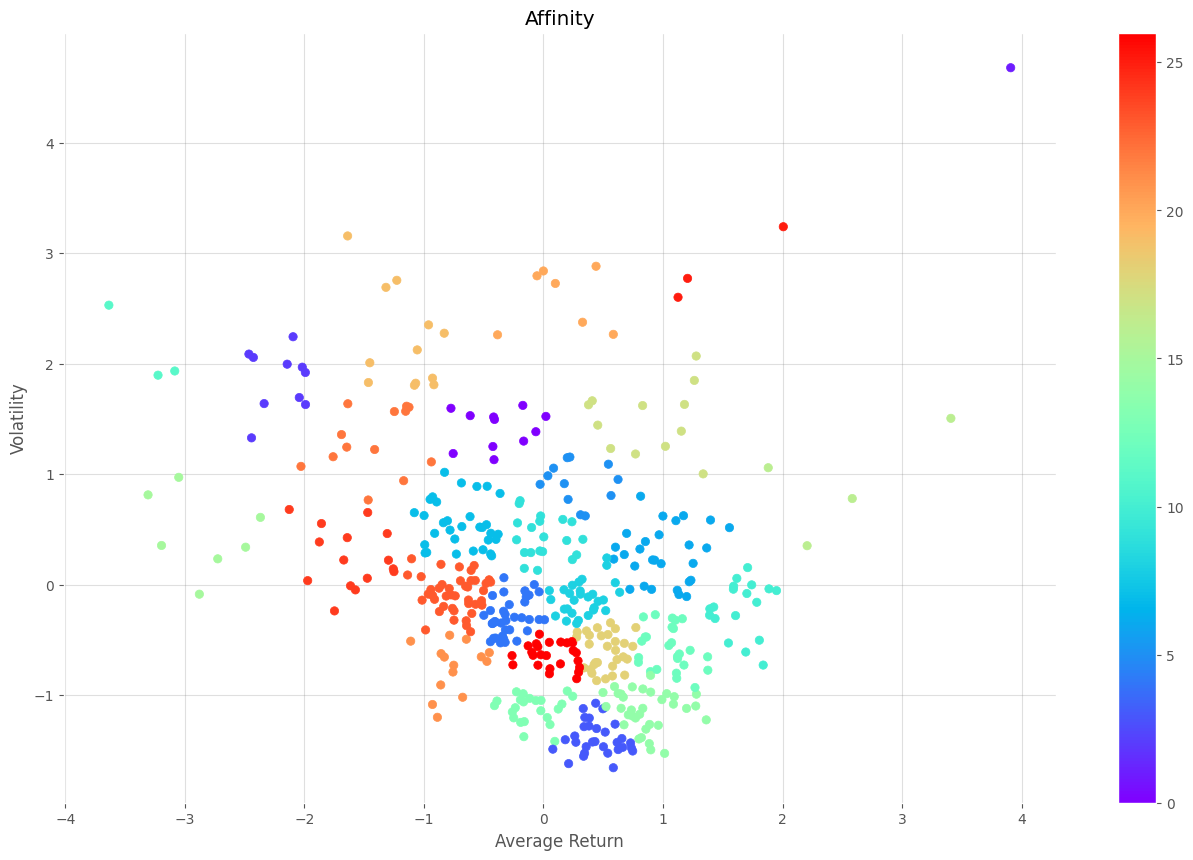

In [136]:
fig = plt.figure(figsize=(16,10)
                )
ax = fig.add_subplot(111)

scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c = clust_labels2, cmap = "rainbow")

ax.set_title("Affinity")
ax.set_xlabel("Average Return")
ax.set_ylabel("Volatility")
             
plt.colorbar(scatter)

In [137]:
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_

Estimated number of clusters: 27


<Figure size 640x480 with 0 Axes>

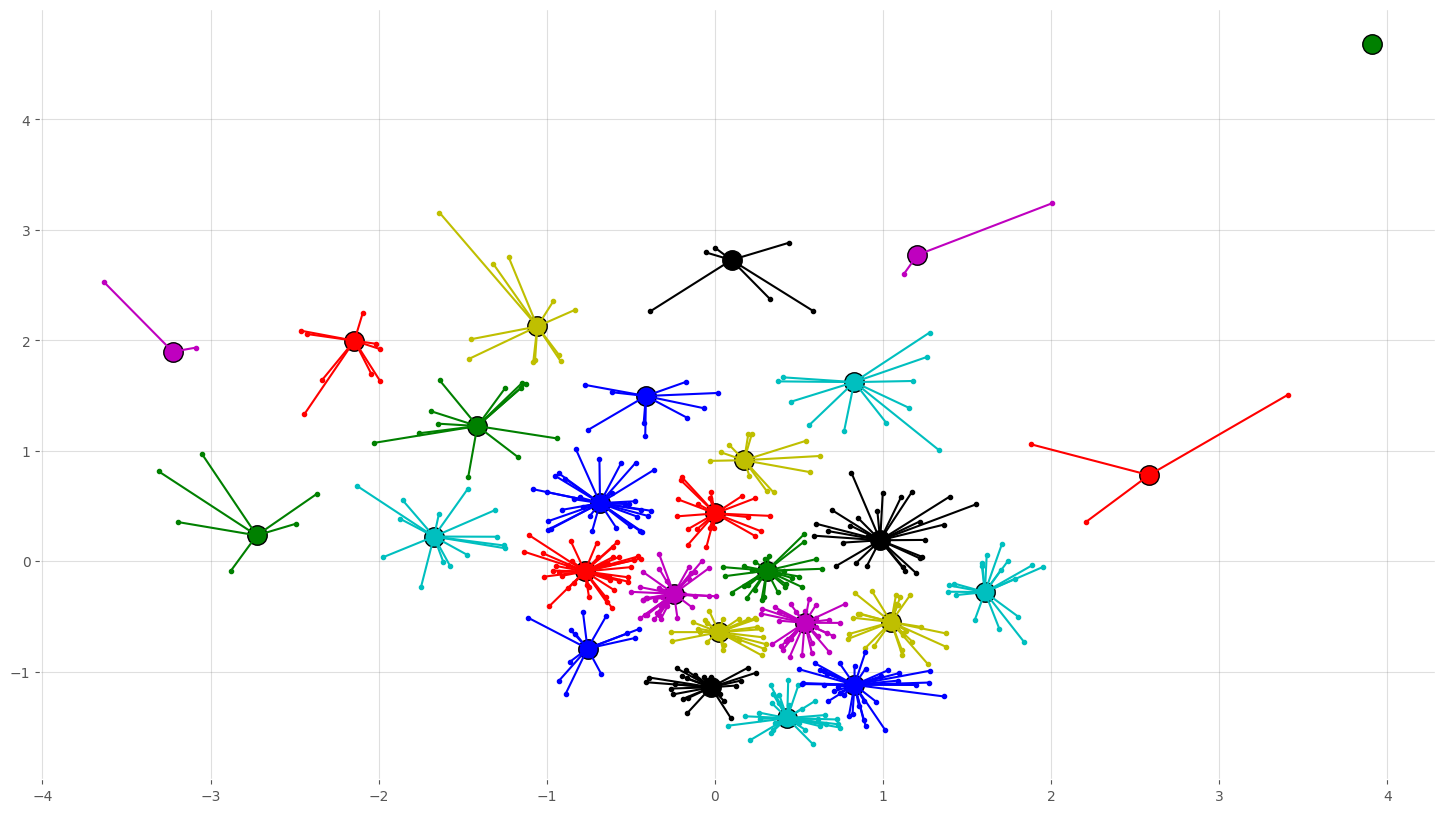

In [138]:
no_clusters = len(cluster_centers_indices)
print("Estimated number of clusters: %d" % no_clusters)

# Plot exemplars

X_temp=np.asarray(X)
plt.close("all")
plt.figure(1)
plt.clf()

fig = plt.figure(figsize=(18,10)
                )
colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")

for k, col in zip(range(no_clusters), colors):
    
    class_members = labels == k
    cluster_center = X_temp[cluster_centers_indices[k]]
    
    plt.plot(X_temp[class_members, 0], X_temp[class_members, 1], col + ".")
    
    plt.plot(cluster_center[0], cluster_center[1], 
             "o", 
             markerfacecolor = col, 
             markeredgecolor = "k", 
             markersize = 14)
    
    for x in X_temp[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.show()

In [139]:
# show number of stocks in each cluster
clustered_series_ap = pd.Series(index=X.index, data=ap.labels_.flatten()
                               )

# clustered stock with its cluster label
clustered_series_all_ap = pd.Series(index=X.index, data=ap.labels_.flatten())
clustered_series_ap = clustered_series_ap[clustered_series != -1]

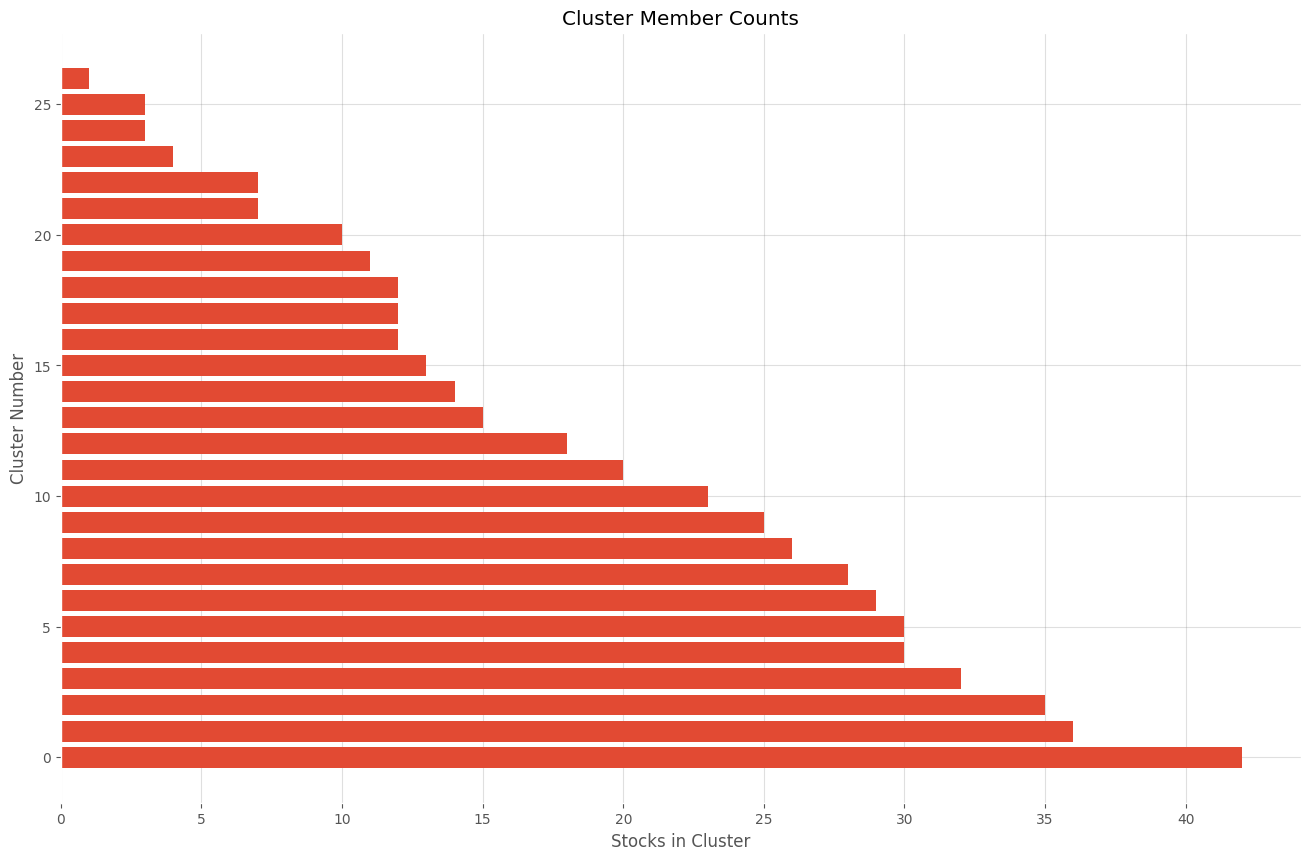

In [140]:
plt.figure(figsize=(16,10)
          )

plt.barh(
    range(len(clustered_series_ap.value_counts()
             )
         ), # cluster labels, y axis
    clustered_series_ap.value_counts()
)

plt.title("Cluster Member Counts")
plt.xlabel("Stocks in Cluster")
plt.ylabel("Cluster Number")

plt.show()

## Cluster Evaluation

In [141]:
print("km", metrics.silhouette_score(X, k_means.labels_, 
                                     metric='euclidean')
     )

print("hc", metrics.silhouette_score(X, hc.fit_predict(X), 
                                     metric='euclidean')
     )

print("ap", metrics.silhouette_score(X, ap.labels_, 
                                     metric='euclidean')
     )

km 0.3528120617099555
hc 0.34321495156408627
ap 0.3450647315156527


## Visualize Return

In [143]:
# All stock with its cluster label (including -1)
clustered_series = pd.Series(index = X.index, data = ap.fit_predict(X).flatten()
                            )

# Clustered stock with its cluster label

clustered_series_all = pd.Series(index = X.index, data = ap.fit_predict(X).flatten()
                                )

clustered_series = clustered_series[clustered_series != -1]

# Get the number of stocks in each cluster
counts = clustered_series_ap.value_counts()

# Let's visualize some clusters
cluster_vis_list = list(counts[(counts < 25) & (counts > 1)].index)[::-1]
cluster_vis_list

[25, 11, 16, 20, 15, 2, 0, 19, 17, 5, 22, 21, 24, 10, 9, 13]

In [144]:
CLUSTER_SIZE_LIMIT = 9999

counts = clustered_series.value_counts()

ticker_count_reduced = counts[(counts>1) & (counts <= CLUSTER_SIZE_LIMIT)]

print ("Clusters formed: %d" % len(ticker_count_reduced)
      )
print ("Pairs to evaluate: %d" % (ticker_count_reduced*(ticker_count_reduced-1)
                                 ).sum()
      )

Clusters formed: 26
Pairs to evaluate: 12166


In [145]:
# plot a handful of the smallest clusters
plt.figure(figsize=(16,10)
          )
cluster_vis_list[0:min(len(cluster_vis_list), 4)]

[25, 11, 16, 20]

<Figure size 1600x1000 with 0 Axes>

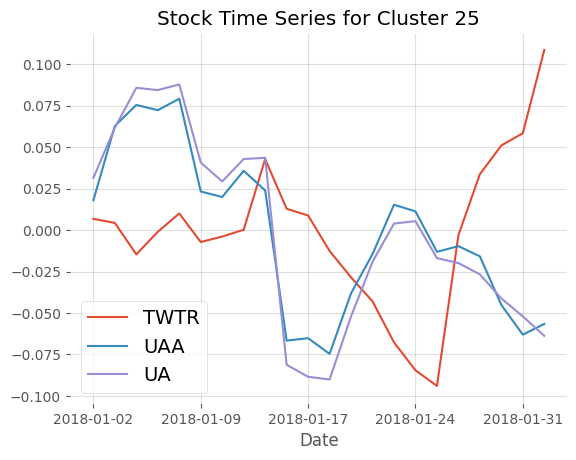

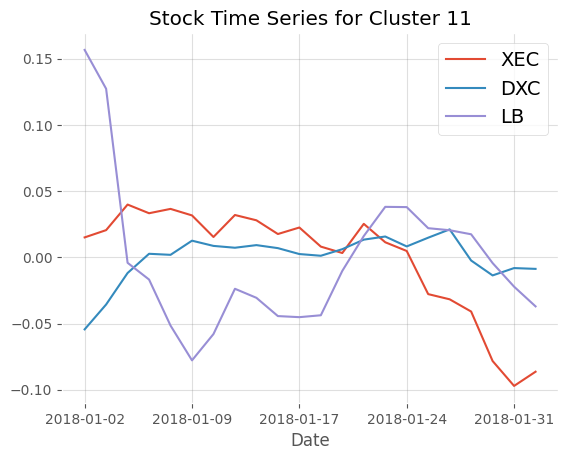

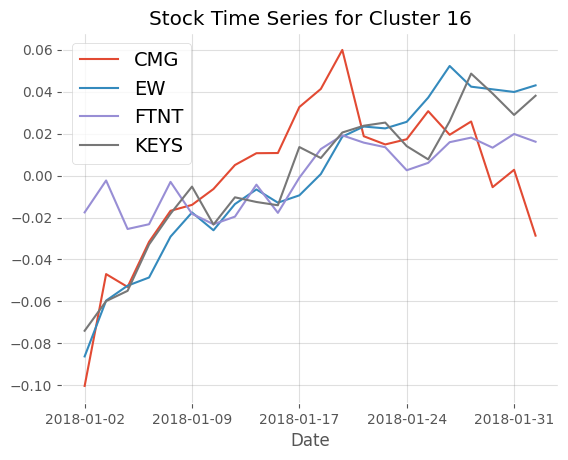

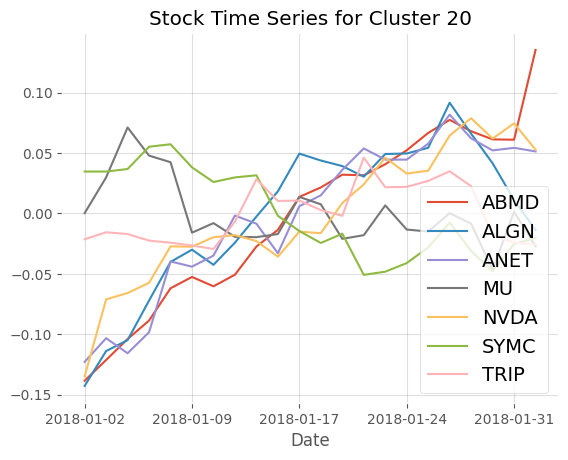

In [146]:
for clust in cluster_vis_list[0:min(len(cluster_vis_list), 4)]:
    
    tickers = list(clustered_series[clustered_series == clust].index)
    
    means = np.log(dataset.loc[:"2018-02-01", tickers].mean())
    
    data = np.log(dataset.loc[:"2018-02-01", tickers]).sub(means)
    
    data.plot(title='Stock Time Series for Cluster %d' % clust)
    
plt.show()

In [153]:
def find_cointegrated_pairs(data, significance=0.05):
    # Get the number of columns in the data (i.e., number of securities)
    n = data.shape[1]
    
    # Initialize a matrix filled with zeros to store cointegration scores
    score_matrix = np.zeros((n, n))
    
    # Initialize a matrix filled with ones to store p-values of the cointegration tests
    pvalue_matrix = np.ones((n, n))
    
    # Extract the column names (security names) from the data
    keys = data.keys()
    
    # List to store pairs of securities that are cointegrated
    pairs = []
    
    # Double loop to go through each combination of securities
    ## Change n to smaller number such as 1, for less values
    ## 1 to n
    for i in range(1):  
        for j in range(i+1, n):
            
            # Extract the time series data for the two securities in consideration
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            
            # Perform the cointegration test between the two securities
            result = coint(S1, S2)
            
            # Extract the score (test statistic) and p-value from the result
            score = result[0]
            pvalue = result[1]
            
            # Store the score and p-value in their respective matrices
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            
            # If the p-value is less than the significance level, 
            # then the pair is considered cointegrated and added to the pairs list
            if pvalue < significance:
                pairs.append((keys[i], keys[j]))

    # Return the score matrix, p-value matrix, and the list of cointegrated pairs
    return score_matrix, pvalue_matrix, pairs

In [149]:
from statsmodels.tsa.stattools import coint

cluster_dict = {}

for i, which_clust in enumerate(ticker_count_reduced.index):
    
    tickers = clustered_series[clustered_series == which_clust].index   
    
    score_matrix, pvalue_matrix, pairs = find_cointegrated_pairs(dataset[tickers]
                                   )
    cluster_dict[which_clust] = {}
    cluster_dict[which_clust]["score_matrix"] = score_matrix
    cluster_dict[which_clust]["pvalue_matrix"] = pvalue_matrix
    cluster_dict[which_clust]["pairs"] = pairs

In [151]:
pairs = []
for clust in cluster_dict.keys():
    pairs.extend(cluster_dict[clust]["pairs"])

print ("Number of pairs found : %d" % len(pairs)
      )
print ("In those pairs, there are %d unique tickers." % len(np.unique(pairs)
                                                           )
      )

Number of pairs found : 32
In those pairs, there are 47 unique tickers.


In [152]:
pairs

[('AOS', 'FITB'),
 ('AOS', 'ZION'),
 ('AIG', 'TEL'),
 ('ABBV', 'BWA'),
 ('ACN', 'EQIX'),
 ('AFL', 'ARE'),
 ('AFL', 'ED'),
 ('AFL', 'MMC'),
 ('AFL', 'WM'),
 ('A', 'WAT'),
 ('ADBE', 'ADI'),
 ('ADBE', 'CDNS'),
 ('ADBE', 'VFC'),
 ('ABT', 'AZO'),
 ('ABT', 'CHD'),
 ('ABT', 'IQV'),
 ('ABT', 'WELL'),
 ('ALL', 'GL'),
 ('MO', 'CCL'),
 ('ALB', 'CTL'),
 ('ALB', 'FANG'),
 ('ALB', 'EOG'),
 ('ALB', 'HP'),
 ('ALB', 'NOV'),
 ('ALB', 'PVH'),
 ('ALB', 'TPR'),
 ('ADSK', 'ULTA'),
 ('ADSK', 'XLNX'),
 ('AAL', 'FCX'),
 ('CMG', 'EW'),
 ('CMG', 'KEYS'),
 ('XEC', 'DXC')]

## HRP